In [1]:
import numpy as np
import pandas as pd
import scipy as sp

import pickle

from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.metrics import roc_curve
%matplotlib inline
# sns.set(font_scale=1.5)
sns.set_style(style='white')

*Disclaimer*: The analysis presented here is directly inspired by the following references:

[1] ProPublica, *“Machine Bias,”* https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing, May 2016.

[2] A. Chouldechova. *"Fair prediction with disparate impact: A study of bias in recidivism prediction instruments."* arXiv preprint arXiv:1703.00056 (2017).

[3] F. P. Calmon, D. Wei, K. Natesan Ramamurthy, and K. R. Varshney, *“Optimized Data Pre- Processing for Discrimination Prevention,”* arXiv preprint arXiv:1704.03354 (2017)

In [55]:
# with open ('compas_train.data', 'rb') as f1:
#     train = pickle.load(f1)
with open ('compas_test.data', 'rb') as f2:
    test = pickle.load(f2)

In [56]:
X_train = train['X']
label_train = train['y']
y_train = train['y_dum']
race_train = train['race']
recid_train = train['recid']

NameError: name 'train' is not defined

In [57]:
X_test = test['X']
label_test = test['y']
y_test = test['y_dum']
race_test = test['race']
recid_test = test['recid']

In [75]:
label_train

array([1, 0, 1, ..., 1, 1, 0])

# Train is recile

In [10]:
y_train_model = {}
y_test_model = {}

## Random Forest 

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
rfc = RandomForestClassifier(n_estimators=10, max_features=4, criterion='gini', max_depth=7)
rfc.fit(X_train, recid_train)
print(rfc.score(X_train, recid_train))
print(rfc.score(X_test, recid_test))

0.723842592593
0.685205183585


In [13]:
PYgX_train_rf = rfc.predict_proba(X_train)[:, 1]
y_train_rf = np.zeros((len(PYgX_train_rf), 1))
quantize_threshold = [0.33, 0.65]
for i in range(len(PYgX_train_rf)):
    if PYgX_train_rf[i] <= quantize_threshold[0]:
        y_train_rf[i] = 0
    elif quantize_threshold[0] <= PYgX_train_rf[i] <= quantize_threshold[1]:
        y_train_rf[i] = 1
    else:
        y_train_rf[i] = 2

In [14]:
_, count = np.unique(y_train_rf, return_counts=True)
count/len(y_train_rf)

array([ 0.33634259,  0.38425926,  0.27939815])

In [15]:
PYgX_test_rf = rfc.predict_proba(X_test)[:, 1]
y_test_rf = np.zeros((len(PYgX_test_rf), 1))
quantize_threshold = [0.33, 0.65]
for i in range(len(PYgX_test_rf)):
    if PYgX_test_rf[i] <= quantize_threshold[0]:
        y_test_rf[i] = 0
    elif quantize_threshold[0] <= PYgX_test_rf[i] <= quantize_threshold[1]:
        y_test_rf[i] = 1
    else:
        y_test_rf[i] = 2

In [16]:
_, count = np.unique(y_test_rf, return_counts=True)
count/len(y_test_rf)

array([ 0.32721382,  0.39578834,  0.27699784])

In [17]:
y_train_model['rf'] = pd.get_dummies(pd.DataFrame(y_train_rf).astype(int)[0])
y_test_model['rf'] = pd.get_dummies(pd.DataFrame(y_test_rf).astype(int)[0])

## Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegressionCV

In [19]:
lrcv = LogisticRegressionCV(Cs=10, fit_intercept=True, cv=5, penalty='l2')
lrcv.fit(X_train, recid_train)
print(lrcv.score(X_train, recid_train))
print(lrcv.score(X_test, recid_test))

0.686111111111
0.695464362851


In [20]:
PYgX_train_lr = lrcv.predict_proba(X_train)[:, 1]
y_train_lr = np.zeros((len(PYgX_train_lr), 1))
quantize_threshold = [0.41, 0.58]
for i in range(len(PYgX_train_lr)):
    if PYgX_train_lr[i] <= quantize_threshold[0]:
        y_train_lr[i] = 0
    elif quantize_threshold[0] <= PYgX_train_lr[i] <= quantize_threshold[1]:
        y_train_lr[i] = 1
    else:
        y_train_lr[i] = 2

In [21]:
_, count = np.unique(y_train_lr, return_counts=True)
count/len(y_train_lr)

array([ 0.34259259,  0.39236111,  0.2650463 ])

In [22]:
PYgX_test_lr = lrcv.predict_proba(X_test)[:, 1]
y_test_lr = np.zeros((len(PYgX_test_lr), 1))
quantize_threshold = [0.41, 0.58]
for i in range(len(PYgX_test_lr)):
    if PYgX_test_lr[i] <= quantize_threshold[0]:
        y_test_lr[i] = 0
    elif quantize_threshold[0] <= PYgX_test_lr[i] <= quantize_threshold[1]:
        y_test_lr[i] = 1
    else:
        y_test_lr[i] = 2

In [23]:
_, count = np.unique(y_test_lr, return_counts=True)
count/len(y_test_lr)

array([ 0.33207343,  0.40172786,  0.2661987 ])

In [24]:
y_train_model['lr'] = pd.get_dummies(pd.DataFrame(y_train_lr).astype(int)[0])
y_test_model['lr'] = pd.get_dummies(pd.DataFrame(y_test_lr).astype(int)[0])

## NN

In [25]:
from sklearn.neural_network import MLPClassifier

In [26]:
nn = MLPClassifier()
nn.fit(X_train, recid_train)
print(nn.score(X_train, recid_train))
print(nn.score(X_test, recid_test))

0.683101851852
0.687904967603


In [27]:
PYgX_train_nn = nn.predict_proba(X_train)[:, 1]
y_train_nn = np.zeros((len(PYgX_train_nn), 1))
quantize_threshold = [0.35, 0.55]
for i in range(len(PYgX_train_nn)):
    if PYgX_train_nn[i] <= quantize_threshold[0]:
        y_train_nn[i] = 0
    elif quantize_threshold[0] <= PYgX_train_nn[i] <= quantize_threshold[1]:
        y_train_nn[i] = 1
    else:
        y_train_nn[i] = 2

In [28]:
_, count = np.unique(y_train_nn, return_counts=True)
count/len(y_train_nn)

array([ 0.23263889,  0.3650463 ,  0.40231481])

In [29]:
PYgX_test_nn = nn.predict_proba(X_test)[:, 1]
y_test_nn = np.zeros((len(PYgX_test_nn), 1))
quantize_threshold = [0.36, 0.61]
for i in range(len(PYgX_test_nn)):
    if PYgX_test_nn[i] <= quantize_threshold[0]:
        y_test_nn[i] = 0
    elif quantize_threshold[0] <= PYgX_test_nn[i] <= quantize_threshold[1]:
        y_test_nn[i] = 1
    else:
        y_test_nn[i] = 2

In [30]:
_, count = np.unique(y_test_nn, return_counts=True)
count/len(y_test_nn)

array([ 0.22786177,  0.46436285,  0.30777538])

In [31]:
y_train_model['nn'] = pd.get_dummies(pd.DataFrame(y_train_nn).astype(int)[0])
y_test_model['nn'] = pd.get_dummies(pd.DataFrame(y_test_nn).astype(int)[0])

## Find PICs and PFs

In [167]:
train_x = pd.read_csv('compas_train_x.csv').iloc[:, 1:]
train_y = pd.read_csv('compas_train_y.csv').iloc[:, 1:]

test_x = pd.read_csv('compas_test_x.csv').iloc[:, 1:]
test_y = pd.read_csv('compas_test_y.csv').iloc[:, 1:]

In [78]:
# -*- coding: utf-8 -*-
""""
Convoutional NN script for MNIST based on Tensorflow Tutorial.

Author: fdcalmon@us.ibm.com
"""

import tensorflow as tf
import pickle
import gzip
import numpy as np
import scipy as sp
import time
import pandas as pd

d = 2
epsilon = 1e-3

def xavier_init(size):
    in_dim = size[0]
    xavier_stddev = 1. / tf.sqrt(in_dim / 2.)
    return tf.random_normal(shape=size, stddev=xavier_stddev)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

# def quantizeP(p):
#     result = np.zeros((p.shape[0], 3))
    

# F Net
X = tf.placeholder(tf.float32, shape=[None, 5], name='X1')

# Layer 1
F_W1 = tf.Variable(xavier_init([5, 20]), name='F_W1')
F_b1 = tf.Variable(tf.zeros(shape=[20]), name='F_b1')

# Layer 2
F_W2 = tf.Variable(xavier_init([20, 20]), name='F_W2')
F_b2 = tf.Variable(tf.zeros(shape=[20]), name='F_b2')

# Layer 3
F_W3 = tf.Variable(xavier_init([64, 64]), name='F_W3')
F_b3 = tf.Variable(tf.zeros(shape=[64]), name='F_b3')

# Layer 4
F_W4 = tf.Variable(xavier_init([64, 32]), name='F_W4')
F_b4 = tf.Variable(tf.zeros(shape=[32]), name='F_b4')

# Layer 5
F_W5 = tf.Variable(xavier_init([20, d]), name='F_W5')
F_b5 = tf.Variable(tf.zeros(shape=[d]), name='F_b5')

theta_F = [F_W1, F_W2, F_b1, F_b2, F_W3, F_b3, F_W4, F_b4]

# G Net
Y = tf.placeholder(tf.float32, shape=[None, d+1], name='X2')

# Layer 1
G_W1 = tf.Variable(xavier_init([d+1, 10]), name='G_W1')
G_b1 = tf.Variable(tf.zeros(shape=[10]), name='G_b1')

# Layer 2
G_W2 = tf.Variable(xavier_init([20, 20]), name='G_W2')
G_b2 = tf.Variable(tf.zeros(shape=[20]), name='G_b2')

# Layer 3
G_W3 = tf.Variable(xavier_init([64, 32]), name='G_W3')
G_b3 = tf.Variable(tf.zeros(shape=[32]), name='G_b3')

# Layer 4
G_W4 = tf.Variable(xavier_init([10, d]), name='G_W4')
G_b4 = tf.Variable(tf.zeros(shape=[d]), name='G_b4')

theta_G = [G_W1, G_W2, G_b1, G_b2, G_W3, G_b3, G_W4, G_b4]

# H Net
# keep_prob = tf.placeholder(tf.float32, [1, 1])
x_ = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

# Likelihood
likelihood = tf.placeholder(tf.float32, [None, d+1])

def lrelu(x, alpha=0.2):
    return tf.nn.relu(x) - alpha * tf.nn.relu(-x)

alpha = 0.2

def F_net(x):
    F_h1 = lrelu(tf.matmul(x, F_W1) + F_b1, alpha)
#     F_h2 = lrelu(tf.matmul(F_h1, F_W2) + F_b2, alpha) 
#     F_h3 = lrelu(tf.matmul(F_h2, F_W3) + F_b3, alpha)
#     F_h4 = lrelu(tf.matmul(F_h3, F_W4) + F_b4, alpha)
    F_logit = tf.matmul(F_h1, F_W5) + F_b5
    
    constF = tf.fill([tf.shape(F_logit)[0],1],np.float32(1))
    final_output_F = tf.concat([constF,F_logit],axis=1)
    return final_output_F

def G_net(y):
    G_h1 = lrelu(tf.matmul(y, G_W1) + G_b1, alpha)
#     G_h2 = lrelu(tf.matmul(G_h1, G_W2) + G_b2, alpha)
#     G_h3 = lrelu(tf.matmul(G_h2, G_W3) + G_b3, alpha)
    G_logit = tf.matmul(G_h1, G_W4) + G_b4
    
    constG = tf.fill([tf.shape(G_logit)[0],1],np.float32(1))
    final_output_G = tf.concat([constG,G_logit],axis=1)

    z = tf.eye(d+1)
    G_h12 = tf.nn.relu(tf.matmul(z, G_W1) + G_b1)
#     G_h22 = tf.nn.relu(tf.matmul(G_h12, G_W2) + G_b2)
#     G_h32 = tf.nn.relu(tf.matmul(G_h22, G_W3) + G_b3)
    G_logit2 = tf.matmul(G_h12, G_W4) + G_b4
    constG2 = tf.fill([tf.shape(G_logit2)[0],1],np.float32(1))
    output_G_all_labels = tf.concat([constG2,G_logit2],axis=1)
    return final_output_G, output_G_all_labels

def F_loss_svd(f_out, g_out, mb_size):
    """
    Create the loss function that will be minimized by the fg-net. Many options exist.
    The implementation below uses the 1-Schatten norm from the derivation. It might slow.
    
    
    Inputs: f_out and g_out, which are tensors of the same shape produced by the outut
            of the f and g nets. Assumes that they are of the form (#batches, #output).
            
    Outputs: returns objective
    """
    th = 10000
    clip_min = np.float32(-th)
    clip_max=np.float32(th)
    # number of samples in batch
    nBatch = mb_size
    
    # we clip f to avoid runaway arguments
    f_clip = tf.clip_by_value(f_out,clip_min,clip_max)
    
    # create correlation matrices
    corrF = tf.matmul(tf.transpose(f_clip),f_clip)/nBatch
    corrFG = tf.matmul(tf.transpose(f_clip),g_out)/nBatch
    
    corrF = tf.Print(corrF, [corrF])
    
    # Second moment of g
    sqG = tf.reduce_sum(tf.reduce_mean(tf.square(g_out),0))
    
    # compute svd in objective
    n = tf.shape(corrF)[0] 
    
    #correction term
    epsilon =1e-2
#     noise = epsilon*tf.random_normal(corrF.shape, 1e-2, 1e-3)
#     noise_sym = (noise+tf.transpose(noise))/2
    
    invCorrF = tf.matrix_inverse(corrF+epsilon*tf.eye(n), adjoint=True)
    
    prodGiFG = tf.matmul(tf.matmul(tf.transpose(corrFG),invCorrF),corrFG) #
#     prodGiFG = tf.matmul(tf.matmul(corrFG,invCorrF),tf.transpose(corrFG))
    
    
    s,v = tf.self_adjoint_eig(prodGiFG)
    #s,u,v = tf.svd(prodGiFG)
    
    schatNorm = tf.reduce_sum(tf.sqrt(tf.abs(s)))
    #schatNorm = tf.reduce_sum(tf.abs(s))
    
    # define objective
    objective = sqG - 2*schatNorm 
    
    #return objective
    return objective, schatNorm

def loss_P_YgX(f_out, g_out, mb_size, likelihood):

    # define clip ranges
    th = 10000
    clip_min = np.float32(-th)
    clip_max = np.float32(th)
    # number of samples in batch
    nBatch = mb_size
    
    # we clip f to avoid runaway arguments
    f_clip = tf.clip_by_value(f_out,clip_min,clip_max)
#     g_clip = tf.clip_by_value(g_out,clip_min,clip_max)
    g_clip = g_out
    # g_out = g_out[0:10, 0:10]

    # C_f
    corrF = tf.matmul(tf.transpose(f_clip),f_clip)/nBatch
    # tf.Print(corrF, [corrF])
    

    # C_{fg}
    # corrFG = tf.matmul(tf.transpose(f_clip),g_out)
    corrFG = tf.matmul(tf.transpose(f_clip), tf.matmul(likelihood, g_clip))/nBatch

    # Second moment of g
    sqG = tf.reduce_sum(tf.matmul(likelihood, tf.reshape(tf.reduce_sum(tf.square(g_clip), axis=1), [3, 1])))/nBatch

    # compute svd in objective
    n = tf.shape(corrF)[0] 
    
    #correction term
    epsilon = 1e-3
#     noise = epsilon*tf.random_normal(corrF.shape, epsilon, epsilon)
#     noise_sym = (noise+tf.transpose(noise))/2
    
    invCorrF = tf.matrix_inverse(corrF+epsilon*tf.eye(n), adjoint=True) #check
    # print(invCorrF.shape)
    
    prodGiFG = tf.matmul(tf.matmul(tf.transpose(corrFG),invCorrF),corrFG)
    
    s,v = tf.self_adjoint_eig(prodGiFG)
    
    schatNorm = tf.reduce_sum(tf.sqrt(tf.abs(s)))
    #schatNorm = tf.reduce_sum(tf.abs(s))
    
    # define objective
    objective = sqG - 2*schatNorm 
    
    return objective, schatNorm

def computeMetrics(F,G):
    corrF = F.transpose().dot(F)/F.shape[0]
    corrFG = F.transpose().dot(G)/G.shape[0]
    corrG = G.transpose().dot(G)/G.shape[0]
    uF,sF,vF = np.linalg.svd(corrF)
    invFsqrt = (uF*(sF**(-.5))).dot(vF)
    u,s,v = np.linalg.svd(invFsqrt.dot(corrFG))
    Anorm = v.transpose().dot(u.transpose()).dot(invFsqrt)
    Bnorm = np.diag(np.diag(corrG)**(-.5))
    # check if Anorm whitens
    wF = F.dot(Anorm.transpose())
    wG = G.dot(Bnorm)
    newCorr = wF.transpose().dot(wF)/F.shape[0]
    trueCorr = wF.transpose().dot(wG)/G.shape[0]
    return (trueCorr, corrG, newCorr, Anorm, Bnorm, wF, wG)

def H_net(x):
    # First layer
    W_conv1 = weight_variable([5, 5, 1, 32])
    b_conv1 = bias_variable([32])
    x_image = tf.reshape(x, [-1, 28, 28, 1])
    h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
    h_pool1 = max_pool_2x2(h_conv1)

    # Second layer
    W_conv2 = weight_variable([5, 5, 32, 64])
    b_conv2 = bias_variable([64])
    h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
    h_pool2 = max_pool_2x2(h_conv2)

    # Densely connected layer
    W_fc1 = weight_variable([7 * 7 * 64, 1024])
    b_fc1 = bias_variable([1024])
    h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

    # Dropout to avoid overfitting
    keep_prob = tf.placeholder(tf.float32)
    h_fc1_drop = tf.nn.dropout(h_fc1, 0.5)

    # Readout layer
    W_fc2 = weight_variable([1024, 10])
    b_fc2 = bias_variable([10])
    y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2
    return y_conv

def train(var_name, mb_size, n_steps, n_steps_train):
    '''
    # Pre-train
    H_NET = H_net(x_)
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=H_NET))
    H_solver = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
    correct_prediction = tf.equal(tf.argmax(H_NET, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    likelihood_compute = tf.nn.softmax(H_NET)

    # Construct networks
    F_Net = F_net(X)
    G_Net, G_labels = G_net(Y)
    '''
    F_Net = F_net(X)
    G_Net, G_labels = G_net(Y)

    # Loss functions
#     mb_size = 128
    F_loss, prodGiFG = F_loss_svd(F_Net, G_Net, mb_size)
#     F_loss, prodGiFG = loss_P_YgX(F_Net, G_labels, mb_size, likelihood)
    # G_loss, prodFiGF = G_loss_svd(F_Net, G_Net, mb_size)
    G_loss = F_loss

    # Gradient-based solver
    learning_rate = 0.01
    F_solver = tf.train.AdamOptimizer(learning_rate).minimize(F_loss)
    G_solver = tf.train.AdamOptimizer(learning_rate).minimize(G_loss)

    # run model
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    # saver = tf.train.Saver()

#     file = open(var_name+'_log.txt','w')
    '''
    # Part 1
    file.write('=== Part 1: Pre-training ===\n')
    for it in range(n_steps_train):
        X_mb, Y_mb = mnist.train.next_batch(mb_size)
        sess.run([H_solver, cross_entropy], feed_dict={x_: X_mb, y_: Y_mb})
    file.write('train accuracy %g\n' % accuracy.eval(feed_dict={x_: mnist.train.images, y_: mnist.train.labels}, session=sess))
    file.write('test accuracy %g\n' % accuracy.eval(feed_dict={x_: mnist.test.images, y_: mnist.test.labels}, session=sess))
    '''
#     lrcv = LogisticRegressionCV(Cs=10, fit_intercept=True, cv=5, penalty='l2')
#     lrcv.fit(train_x.values, train_y.values)
    
    # Part 2
#     file.write('=== Part 2 ===\n')
#     file.write('Iter\t sec/iter \t total sec\n')
#     t0 = time.time()
    for it in tqdm(range(n_steps)):
#         print(it)
        randidx = np.random.randint(X_train.shape[0], size=mb_size)
        X_mb = X_train[randidx, :]
        Y_mb = y_train[randidx, :]
        
#         print(lrcv.score(X_mb, y_mb))
        # P_YgX = rfc.predict_proba(X_mb)
        
#         print(P_YgX)

        # np.vstack((np.identity(10), 0.1*np.zeros((mb_size-10, 10))))

#         _, F_loss_curr = sess.run([F_solver, F_loss], feed_dict={X: X_mb, Y: Y_mb, likelihood:P_YgX})
#         _, G_loss_curr = sess.run([G_solver, G_loss], feed_dict={X: X_mb, Y: Y_mb, likelihood:P_YgX})
        _, F_loss_curr = sess.run([F_solver, F_loss], feed_dict={X: X_mb, Y: Y_mb})
        _, G_loss_curr = sess.run([G_solver, G_loss], feed_dict={X: X_mb, Y: Y_mb})
#         if (it+1)%1000 == 0:
#                 t1 =time.time()
#                 total_time = t1-t0
#                 time_per_iter = total_time/(it+1)
#                 file.write('{:.0f}\t {:.5f} \t {:.5f}\n'.format(it+1,time_per_iter,total_time))
#                 file.flush()

    # evaluate on train set
    print('Reconstruct the results')
    F_output_train = sess.run(F_Net, feed_dict={X: X_train})
    G_output_train = sess.run(G_Net, feed_dict={Y: y_train})

#     trueCorr_train, corrG_train, newCorr_train, Anorm_train, Bnorm_train, wF_train, wG_train = computeMetrics(F_output_train, G_output_train)

    train_labels = np.zeros((F_output_train.shape[0], 1))
    for k in range(F_output_train.shape[0]):
        train_labels[k] = list(y_train[k,:]).index(1)
    
    df_data_train = pd.DataFrame(np.hstack((F_output_train, G_output_train, train_labels)))
    df_data_train.to_csv('Data/'+var_name+'_train.csv')

    # evaluate on train set
    F_output_test = sess.run(F_Net, feed_dict={X: X_test})
    G_output_test = sess.run(G_Net, feed_dict={Y: y_test})

#     trueCorr_test, corrG_test, newCorr_test, Anorm_test, Bnorm_test, wF_test, wG_test = computeMetrics(F_output_test, G_output_test)

    test_labels = np.zeros((len(F_output_test), 1))
    for k in range(len(F_output_test)):
        test_labels[k] = list(y_test[k,:]).index(1)

    df_data_test = pd.DataFrame(np.hstack((F_output_test, G_output_test, test_labels)))
    df_data_test.to_csv('Data/'+var_name+'_test.csv')

    # save_path = saver.save(sess, var_name+'.ckpt')

#     file.close()
    sess.close()
    return 

def train_model(var_name, mb_size, n_steps, train_type):
    F_Net = F_net(X)
    G_Net, G_labels = G_net(Y)

    # Loss functions
    F_loss, prodGiFG = loss_P_YgX(F_Net, G_labels, mb_size, likelihood)
    G_loss = F_loss

    # Gradient-based solver
    learning_rate = 0.01
    F_solver = tf.train.AdamOptimizer(learning_rate).minimize(F_loss)
    G_solver = tf.train.AdamOptimizer(learning_rate).minimize(G_loss)

    # run model
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    # saver = tf.train.Saver()

    file = open(var_name+'_log.txt','w')

    file.write('=== Part 2 ===\n')
    file.write('Iter\t sec/iter \t total sec\n')
    t0 = time.time()
    for it in tqdm(range(n_steps)):
#         print(it)
        randidx = np.random.randint(len(train_x), size=mb_size)
        X_mb = train_x.iloc[randidx, :].values
        Y_mb = train_y.iloc[randidx].values

        if train_type == 'rf':
            P_YgX = rfc.predict_proba(X_mb)
        if train_type == 'lr':
            P_YgX = lrcv.predict_proba(X_mb)
        if train_type == 'nn':
            P_YgX = nn.predict_proba(X_mb)

        _, F_loss_curr = sess.run([F_solver, F_loss], feed_dict={X: X_mb, Y: Y_mb, likelihood:P_YgX})
        _, G_loss_curr = sess.run([G_solver, G_loss], feed_dict={X: X_mb, Y: Y_mb, likelihood:P_YgX})
        if (it+1)%1000 == 0:
                t1 =time.time()
                total_time = t1-t0
                time_per_iter = total_time/(it+1)
                file.write('{:.0f}\t {:.5f} \t {:.5f}\n'.format(it+1,time_per_iter,total_time))
                file.flush()

    # evaluate on train set
    print('Reconstruct the results')
    F_output_train = sess.run(F_Net, feed_dict={X: train_x.values})
    G_output_train = sess.run(G_Net, feed_dict={Y: train_y.values})

#     trueCorr_train, corrG_train, newCorr_train, Anorm_train, Bnorm_train, wF_train, wG_train = computeMetrics(F_output_train, G_output_train)

    train_labels = np.zeros((F_output_train.shape[0], 1))
    for k in range(F_output_train.shape[0]):
        train_labels[k] = list(train_y.values[k]).index(1)
    
    df_data_train = pd.DataFrame(np.hstack((F_output_train, G_output_train, train_labels)))
    df_data_train.to_csv('Data/'+var_name+'_train.csv')

    # evaluate on train set
    F_output_test = sess.run(F_Net, feed_dict={X: test_x.values})
    G_output_test = sess.run(G_Net, feed_dict={Y: test_y.values})

#     trueCorr_test, corrG_test, newCorr_test, Anorm_test, Bnorm_test, wF_test, wG_test = computeMetrics(F_output_test, G_output_test)

    test_labels = np.zeros((len(F_output_test), 1))
    for k in range(len(F_output_test)):
        test_labels[k] = list(test_y.values[k]).index(1)

    df_data_test = pd.DataFrame(np.hstack((F_output_test, G_output_test, test_labels)))
    df_data_test.to_csv('Data/'+var_name+'_test.csv')

    # save_path = saver.save(sess, var_name+'.ckpt')

    file.close()
    sess.close()        
    
def train_model_2(var_name, mb_size, n_steps, train_type, train_x_model, test_x_model, train_y_model, test_y_model):
    F_Net = F_net(X)
    G_Net, G_labels = G_net(Y)

    # Loss functions
    F_loss, prodGiFG = F_loss_svd(F_Net, G_Net, mb_size)
    G_loss = F_loss

    # Gradient-based solver
    learning_rate = 0.01
    F_solver = tf.train.AdamOptimizer(learning_rate).minimize(F_loss)
    G_solver = tf.train.AdamOptimizer(learning_rate).minimize(G_loss)

    # run model
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

#     file = open(var_name+'_log.txt','w')

#     file.write('=== Part 2 ===\n')
#     file.write('Iter\t sec/iter \t total sec\n')
#     t0 = time.time()
    for it in tqdm(range(n_steps)):
        randidx = np.random.randint(len(train_x_model), size=mb_size)
        X_mb = train_x_model.iloc[randidx, :].values
        Y_mb = train_y_model.iloc[randidx, :].values

        _, F_loss_curr = sess.run([F_solver, F_loss], feed_dict={X: X_mb, Y: Y_mb})
        _, G_loss_curr = sess.run([G_solver, G_loss], feed_dict={X: X_mb, Y: Y_mb})
#         if (it+1)%1000 == 0:
#                 t1 =time.time()
#                 total_time = t1-t0
#                 time_per_iter = total_time/(it+1)
#                 file.write('{:.0f}\t {:.5f} \t {:.5f}\n'.format(it+1,time_per_iter,total_time))
#                 file.flush()

    # evaluate on train set
    print('Reconstruct the results')
    F_output_train = sess.run(F_Net, feed_dict={X: train_x_model.values})
    G_output_train = sess.run(G_Net, feed_dict={Y: train_y_model.values})

#     train_labels = np.zeros((F_output_train.shape[0], 1))
#     for k in range(F_output_train.shape[0]):
#         train_labels[k] = list(train_y_model.values[k]).index(1)
    
    df_data_train = pd.DataFrame(np.hstack((F_output_train, G_output_train, train_labels)))
    df_data_train.to_csv('Data/'+var_name+'_train.csv')

    # evaluate on train set
    F_output_test = sess.run(F_Net, feed_dict={X: test_x_model.values})
    G_output_test = sess.run(G_Net, feed_dict={Y: test_y_model.values})

#     test_labels = np.zeros((len(F_output_test), 1))
#     for k in range(len(F_output_test)):
#         test_labels[k] = list(test_y_model.values[k]).index(1)

    df_data_test = pd.DataFrame(np.hstack((F_output_test, G_output_test, test_labels)))
    df_data_test.to_csv('Data/'+var_name+'_test.csv')

#     file.close()
    sess.close()

In [79]:
file_name = 'compas_pic'
train(var_name = file_name, mb_size = 256, n_steps = 20000, n_steps_train = 0)


  1%|          | 203/20000 [00:01<02:01, 162.36it/s]
Exception in thread Thread-9:
Traceback (most recent call last):
  File "/Users/hsianghsu/anaconda/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/Users/hsianghsu/anaconda/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/Users/hsianghsu/anaconda/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

100%|██████████| 20000/20000 [01:54<00:00, 175.21it/s]


Reconstruct the results


NameError: name 'file' is not defined

In [46]:
suffix = ['rf', 'lr', 'nn']
for i in range(len(suffix)):
    file_name = 'compas_pic_model' + suffix[i]
    train_model_2(file_name, 256, 20000, suffix[i], X_train, X_test, y_train_model[suffix[i]], y_test_model[suffix[i]])

100%|██████████| 20000/20000 [02:24<00:00, 138.80it/s]


Reconstruct the results


100%|██████████| 20000/20000 [01:58<00:00, 169.24it/s]


Reconstruct the results


100%|██████████| 20000/20000 [02:02<00:00, 163.63it/s]


Reconstruct the results


In [574]:
suffix = ['rf', 'lr', 'nn']
for i in range(len(suffix)):
    file_name = 'compas_pic_' + suffix[i]
    train_model(var_name = file_name, mb_size = 256, n_steps = 20000, train_type = suffix[i])

100%|██████████| 20000/20000 [02:15<00:00, 147.13it/s]


Reconstruct the results


100%|██████████| 20000/20000 [01:55<00:00, 173.29it/s]


Reconstruct the results


100%|██████████| 20000/20000 [01:54<00:00, 175.36it/s]


Reconstruct the results


## CA

In [2]:
csv_labels = ['', 'modelrf_', 'modellr_', 'modelnn_']
df_train = {}
df_test = {}
for i in range(4):
    df_train[i] = pd.DataFrame.from_csv('Data/compas_pic_' + csv_labels[i] + 'train.csv')
    df_test[i] = pd.DataFrame.from_csv('Data/compas_pic_' + csv_labels[i] + 'test.csv')

In [3]:
d = 3

def data_parser(df, d):
    # Raw output from F_net
    F_output = df.iloc[:, 0:d].values
    # Raw output from G_net
    G_output = df.iloc[:, d:2*d].values
    
    # Whitening output from F and G nets
#     wF = df.iloc[:, 2*d:3*d].values
#     wG = df.iloc[:, 3*d:4*d].values
    
    labels = df.iloc[:, -1].values
    
    return F_output, G_output, labels

def normalizeFG(F,G):
    # Values for G
    Gs = G[:,1:]
    b_mean = Gs.mean(axis=0)
    Gs = Gs - b_mean
    corrG = Gs.transpose().dot(Gs)/Gs.shape[0]
    U,v,_ = np.linalg.svd(corrG)
    corrG_sqrt_inv = (U*(v)**(-.5)).dot(U.transpose())
    
    b_mean = np.concatenate(([0],b_mean))
    B = sp.linalg.block_diag(1,corrG_sqrt_inv)
    
    nG = (G-b_mean).dot(B)

    # values for F
    Fs = F[:,1:]
    a_mean = Fs.mean(axis=0)
    Fs = Fs - a_mean
    corrF = Fs.transpose().dot(Fs)/Fs.shape[0]
    U,v,_ = np.linalg.svd(corrF)
    corrF_sqrt_inv = (U*(v)**(-.5)).dot(U.transpose())
    

    a_mean = np.concatenate(([0],a_mean))
    A = sp.linalg.block_diag(1,corrF_sqrt_inv)
    
    nF = (F-a_mean).dot(A)
    
    # Create proper normalization
    U,s,V = np.linalg.svd(nF.transpose().dot(nG)/G.shape[0])

    return A.dot(U),a_mean,B.dot(V.transpose()),b_mean

def normalization(F, G, A, B, a, b):
    wF = (F-a).dot(A)
    wG = (G-b).dot(B)
    return wF, wG

def whiten_FG(F_train, G_train, F, G):
    A, a, B, b = normalizeFG(F_output_train, G_output_train)
    wF, wG = normalization(F, G, A, B, a, b)
    return wF, wG

wF_train = {}
wF_test = {}
wG_train = {}
wG_test = {}
train_labels = {}
test_labels = {}

for i in range(4):
    F_output_train, G_output_train, train_labels[i] = data_parser(df_train[i], d)
    F_output_test, G_output_test, test_labels[i] = data_parser(df_test[i], d)
    wF_train[i], wG_train[i] = whiten_FG(F_output_train, G_output_train, F_output_train, G_output_train)
    wF_test[i], wG_test[i] = whiten_FG(F_output_train, G_output_train, F_output_test, G_output_test)

In [4]:
for i in range(4):
    wF_train[i] = wF_train[i][:, 1:]
    wG_train[i] = wG_train[i][:, 1:]
    wF_test[i] = wF_test[i][:, 1:]
    wG_test[i] = wG_test[i][:, 1:]

In [32]:
# with open ('compas_test_models.data', 'rb') as f1:
#     test = pickle.load(f1)

In [37]:
# wF_test = test['F']
# wG_test = test['G']
# test_labels = test['label']
# race_test = test['race']
# recid_test = test['recid']

In [ ]:
print('a')

Training set PICs: [ 0.68871583  0.37405861]
Test set PICs: [ 0.69158969  0.34167006]
Training set PICs: [ 0.8966412   0.70374809]
Test set PICs: [ 0.9142679   0.73308359]
Training set PICs: [ 0.97797018  0.93073146]
Test set PICs: [ 0.98568513  0.91828695]
Training set PICs: [ 0.95427809  0.87235529]
Test set PICs: [ 0.96619555  0.86989596]


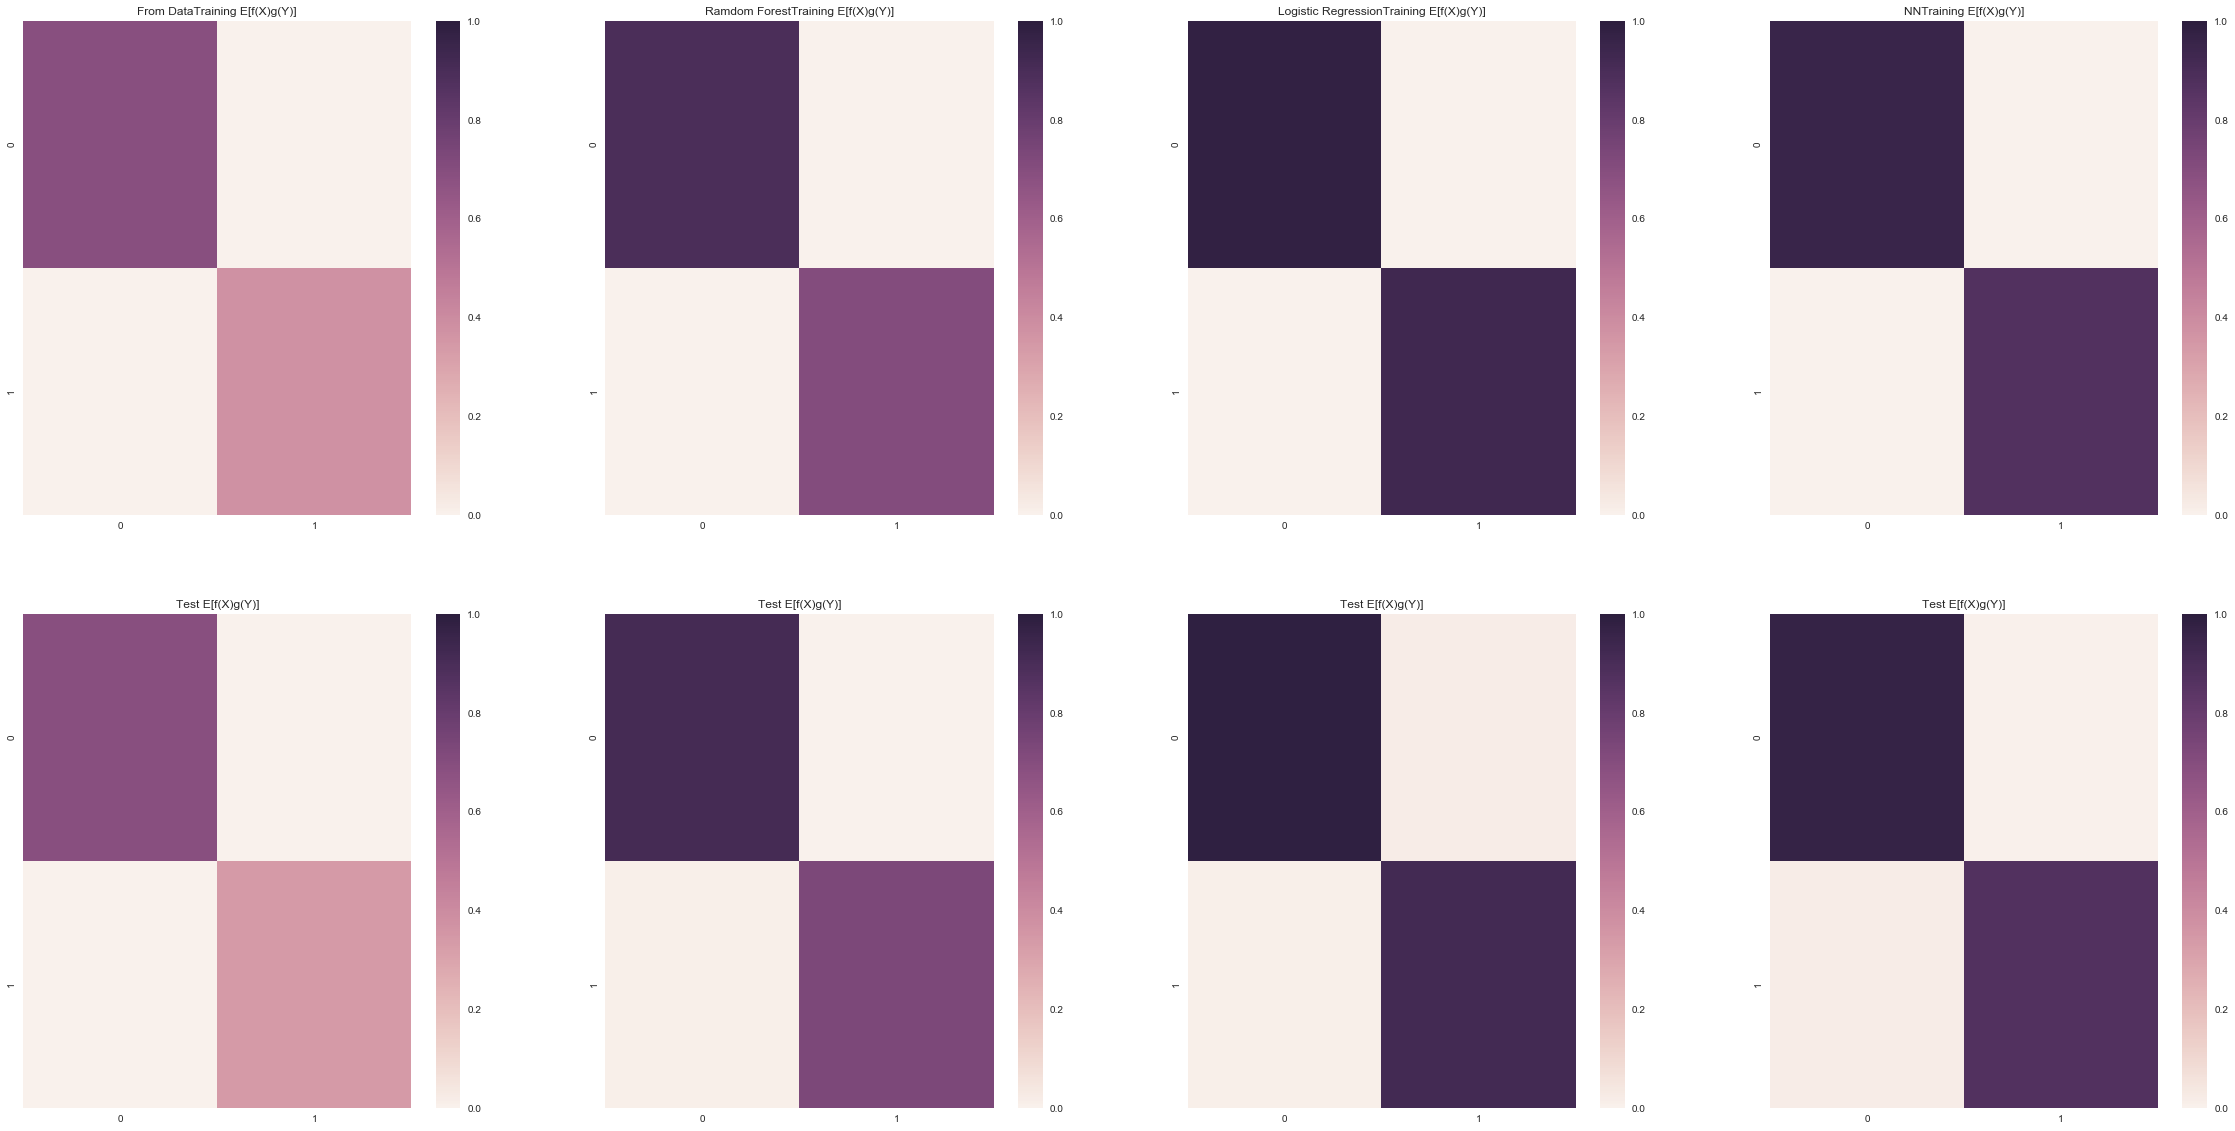

In [5]:
fig, ax = plt.subplots(2, 4, figsize=(40, 20))
subtitles = ['From Data', 'Ramdom Forest', 'Logistic Regression', 'NN']
for j in range(4):
    F_train = wF_train[j]
    G_train = wG_train[j]
    F_test = wF_test[j]
    G_test = wG_test[j]
    trueCorr_train = F_train.transpose().dot(G_train)/G_train.shape[0]
    sns.heatmap(trueCorr_train, vmin=0., vmax = 1., ax=ax[0, j])
    ax[0, j].set_title(subtitles[j]+'Training E[f(X)g(Y)]')
    trueCorr_test = F_test.transpose().dot(G_test)/G_test.shape[0]
    sns.heatmap(trueCorr_test, vmin=0., vmax = 1., ax=ax[1, j])
    ax[1, j].set_title('Test E[f(X)g(Y)]')

    print('Training set PICs: {}'.format(np.diagonal(trueCorr_train)))
    print('Test set PICs: {}'.format(np.diagonal(trueCorr_test)))

In [17]:
def plot_pics(F, G, d, palette, labels, text_labels, axis, fs):
    F_separate = np.zeros((len(F), d))
    G_separate = np.zeros((len(G), d))
    for i in range(d):
        F_separate[:, i] = F[:, i]
        G_separate[:, i] = G[:, i]
    for i in range(d-1):
        F_output_temp1 = F_separate[:, i].reshape((len(F_separate), 1))
        F_output_temp2 = F_separate[:, i+1].reshape((len(F_separate), 1))
        
        G_output_temp1 = G_separate[:, i].reshape((len(G_separate), 1)) 
        G_output_temp2 = G_separate[:, i+1].reshape((len(G_separate), 1))
        for j in range(d+1):
            F_output_draw1 = F_output_temp1[labels==j]
            F_output_draw2 = F_output_temp2[labels==j]
            
            axis.scatter(F_output_draw1, F_output_draw2, alpha = 0.2, color=sns.xkcd_rgb[palette[j]], label=(text_labels[j]))
        for j in range(d+1):         
            G_output_draw1 = G_output_temp1[labels==j]
            G_output_draw2 = G_output_temp2[labels==j]
            
            axis.scatter(G_output_draw1, G_output_draw2, color='black')
#             axis.text(G_output_draw1[0]+0.02, G_output_draw2[0]+0.02, text_labels[j], fontsize=fs)
            axis.set_xlabel(r'$f_'+str(i+1)+'(X)$', fontsize=fs)
            axis.tick_params(labelsize=fs)
#             axis.set_ylabel(r'$f_'+str(i+2)+'(X)$', fontsize=20)
#             axis.legend(loc='best', fontsize=12)

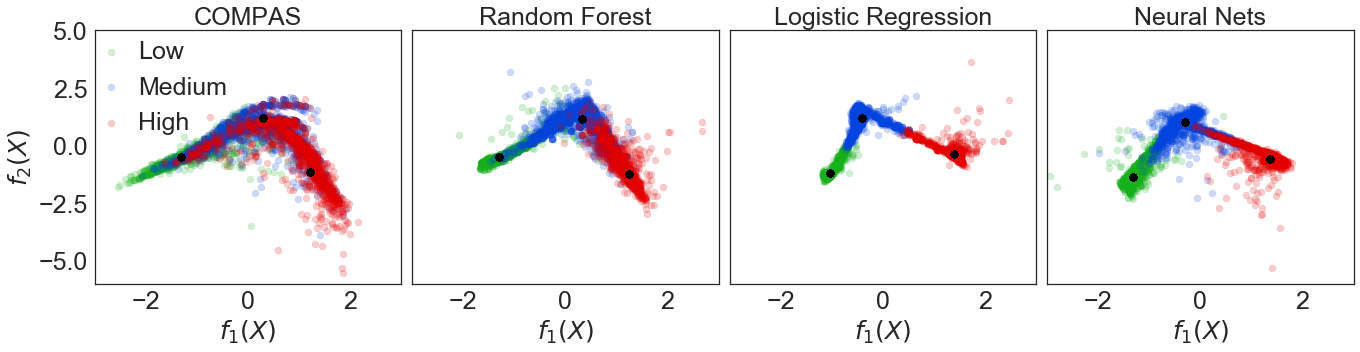

In [51]:
d = 2
palette = [ 'green', 'blue', 'red']
compas_labels = ['Low', 'Medium', 'High']
fs = 25

fig, ax = plt.subplots(1, 4, figsize=(19, 5))
# plt.tight_layout()
# plt.gcf().subplots_adjust(left=0.04, top=0.9, bottom=0.15)
# fig.subplots_adjust(wspace=0.2, hspace=0.4, right=0.8)

for j in range(4):
    F_train = wF_train[j]
    G_train = wG_train[j]
    F_test = wF_test[j]
    G_test = wG_test[j]
#     if j == 1:
#         F_train[:, 0] = -F_train[:, 0]
#         G_train[:, 0] = -G_train[:, 0]
#     if j == 3 or j == 2:
#         F_train[:, 1] = -F_train[:, 1]
#         G_train[:, 1] = -G_train[:, 1]
    plot_pics(F_train, G_train, d, palette, train_labels[j], compas_labels, ax[j], fs)
#     plot_pics(F_test, G_test, d, palette, test_labels[j], compas_labels, ax[j], fs)
    
# max_svd = np.zeros((4, 4))
# for i in range(4):
#     for j in range(4):
#         s = compare_model(wF_train[i], wG_train[i], wF_train[j], wG_train[j], d, test_labels[j])
#         max_svd[i][j] = np.max(s)
        
ax[0].legend(loc='upper left', bbox_to_anchor=(-0.1, 1.05), fontsize=fs, handletextpad=0.05)
ax[0].set_ylabel(r'$f_2(X)$', fontsize=fs)
ax[0].set_title('COMPAS', fontsize=fs)

# ax[0].tick_params(labelsize=fs)

ax[1].set_title('Random Forest', fontsize=fs)
ax[1].set_yticks([])
ax[2].set_title('Logistic Regression', fontsize=fs)
ax[2].set_yticks([])
ax[3].set_title('Neural Nets', fontsize=fs)
ax[3].set_yticks([])
# sns.set(font_scale=2.0)

for i in range(4):
    ax[i].set_xlim(xmin=-3, xmax=3)
    ax[i].set_ylim(ymin=-6, ymax=5)
# g.set_xticklabels(rotation=46)
# plt.xticks(rotation=45)
# plt.yticks(rotation=45)
plt.tight_layout()
fig.savefig('compas_models_FG_train.pdf', format='pdf', dpi=1000)

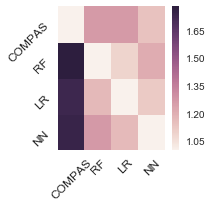

In [28]:
fs = 12
fig = plt.figure(figsize=(3, 3))
max_svd = np.zeros((4, 4))
for i in range(4):
    for j in range(4):
        s = compare_model(wF_train[i], wG_train[i], wF_train[j], wG_train[j], d, train_labels[j])
        max_svd[i][j] = np.max(s)
subtitles = ['COMPAS', 'RF', 'LR', 'NN']
ax = sns.heatmap(max_svd, xticklabels=subtitles, yticklabels=subtitles)
# plt.title('Acc Ratio', fontsize=fs)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tick_params(labelsize=fs)
plt.tight_layout()
fig.savefig('compas_models_FG_acc_train.png', format='png', dpi=1000)

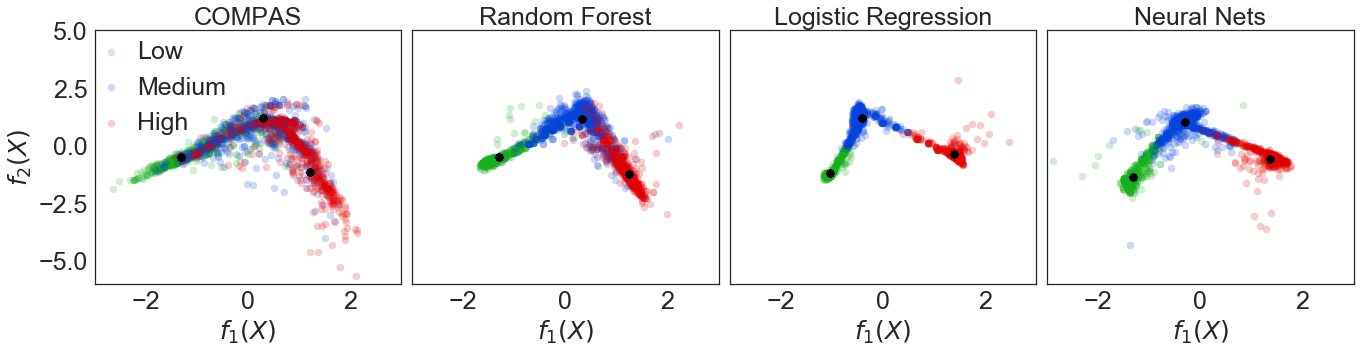

In [52]:
d = 2
palette = [ 'green', 'blue', 'red']
compas_labels = ['Low', 'Medium', 'High']
fs = 25

fig, ax = plt.subplots(1, 4, figsize=(19, 5))
# plt.tight_layout()
# plt.gcf().subplots_adjust(left=0.04, top=0.9, bottom=0.15)
# fig.subplots_adjust(wspace=0.2, hspace=0.4, right=0.8)

for j in range(4):
#     F_train = wF_train[j]
#     G_train = wG_train[j]
    F_test = wF_test[j]
    G_test = wG_test[j]
#     if j == 1:
#         F_test[:, 0] = -F_test[:, 0]
#         G_test[:, 0] = -G_test[:, 0]
#     if j == 3 or j == 2:
#         F_test[:, 1] = -F_test[:, 1]
#         G_test[:, 1] = -G_test[:, 1]
#     plot_pics(F_train, G_train, d, palette, train_labels[j], compas_labels, ax[0, j])
    plot_pics(F_test, G_test, d, palette, test_labels[j], compas_labels, ax[j], fs)
    
# max_svd = np.zeros((4, 4))
# for i in range(4):
#     for j in range(4):
#         s = compare_model(wF_test[i], wG_test[i], wF_test[j], wG_test[j], d, test_labels[j])
#         max_svd[i][j] = np.max(s)
        
ax[0].legend(loc='upper left', bbox_to_anchor=(-0.1, 1.05), fontsize=fs, handletextpad=0.01)
ax[0].set_ylabel(r'$f_2(X)$', fontsize=fs)
ax[0].set_title('COMPAS', fontsize=fs)

# ax[0].tick_params(labelsize=fs)

ax[1].set_title('Random Forest', fontsize=fs)
ax[1].set_yticks([])
ax[2].set_title('Logistic Regression', fontsize=fs)
ax[2].set_yticks([])
ax[3].set_title('Neural Nets', fontsize=fs)
ax[3].set_yticks([])
# sns.set(font_scale=2.0)

for i in range(4):
    ax[i].set_xlim(xmin=-3, xmax=3)
    ax[i].set_ylim(ymin=-6, ymax=5)
# g.set_xticklabels(rotation=46)
# plt.xticks(rotation=45)
# plt.yticks(rotation=45)
plt.tight_layout()
fig.savefig('compas_models_FG_test.pdf', format='pdf', dpi=1000)

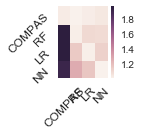

In [102]:
fs = 12
fig = plt.figure(figsize=(3, 3))
max_svd = np.zeros((4, 4))
for i in range(4):
    for j in range(4):
        s = compare_model(wF_test[i], wG_test[i], wF_test[j], wG_test[j], d, test_labels[j])
        max_svd[i][j] = np.max(s)
subtitles = ['COMPAS', 'RF', 'LR', 'NN']
ax = sns.heatmap(max_svd, xticklabels=subtitles, yticklabels=subtitles)
# plt.title('Acc Ratio', fontsize=fs)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tick_params(labelsize=fs)
plt.tight_layout()
fig.savefig('compas_models_FG_acc.pdf', format='pdf', dpi=1000)

## Race

In [62]:
def plot_pics_race(F, G, d, palette, labels, text_labels, text_labels_2, axis, race, recid, a, fs):
    F_separate = np.zeros((len(F), d))
    G_separate = np.zeros((len(G), d))
    for i in range(d):
        F_separate[:, i] = F[:, i]
        G_separate[:, i] = G[:, i]
    for i in range(d-1):
        F_output_temp1 = F_separate[:, i].reshape((len(F_separate), 1))
        F_output_temp2 = F_separate[:, i+1].reshape((len(F_separate), 1))
        
        G_output_temp1 = G_separate[:, i].reshape((len(G_separate), 1)) 
        G_output_temp2 = G_separate[:, i+1].reshape((len(G_separate), 1))
#         for j in range(d+1):         
        F_output_draw1aa = F_output_temp1[(recid==0) & (race==0)]
        F_output_draw1c = F_output_temp1[(recid==0) & (race==1)]
#             F_output_draw1o = F_output_temp1[(labels==j) & (x[:, 0]==2)]
        F_output_draw2aa = F_output_temp2[(recid==0) & (race==0)]
        F_output_draw2c = F_output_temp2[(recid==0) & (race==1)]
#             F_output_draw2o = F_output_temp2[(labels==j) & (x[:, 0]==2)]

        axis.scatter(F_output_draw1aa, F_output_draw2aa, alpha = a, color=sns.xkcd_rgb[palette[0]], label=(text_labels[0]), marker='o')
#         axis.scatter(F_output_draw1c, F_output_draw2c, alpha = a, color=sns.xkcd_rgb[palette[1]], label=(text_labels[1]), marker='o')
#             axis.scatter(F_output_draw1o, F_output_draw2o, alpha = a, color=sns.xkcd_rgb[palette], label=(text_labels[j][2]), marker='o')
        for j in range(d+1):         
            G_output_draw1 = G_output_temp1[labels==j][1]
            G_output_draw2 = G_output_temp2[labels==j][1]
            
            axis.scatter(G_output_draw1, G_output_draw2, color='black')
            axis.text(G_output_draw1+0.1, G_output_draw2+0.1, text_labels_2[j], fontsize=fs)
            axis.set_xlabel(r'$f_'+str(i+1)+'(X)$', fontsize=fs)
            axis.tick_params(labelsize=fs)

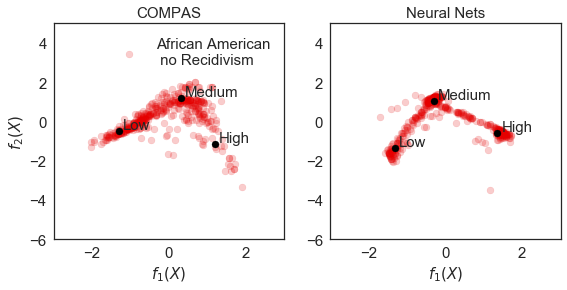

In [64]:
from pylab import *
rcParams["savefig.transparent"] = True

d = 2
# palette = [ ['bright green', 'green', 'dark green'], ['light blue', 'blue', 'dark blue'], ['salmon', 'red', 'scarlet']]
# palette = [['green', 'blue', 'red'], ['green', 'blue', 'red'], ['green', 'blue', 'red']]
palette = ['red', 'blue']
race_labels = ['African American\n no Recidivism', 'Caucasian Recidivism']
compas_labels = ['Low', 'Medium', 'High']
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
# plt.tight_layout()
plt.gcf().subplots_adjust(left=0.07, right=0.95, top=0.9, bottom=0.15)
a = 0.2
fs=15

cnt = 0
for j in [0, 3]:
#     F_train = wF_train[j]
#     G_train = wG_train[j]
    F_test = wF_test[j]
    G_test = wG_test[j]
#     if j == 3:
#         F_test = -wF_test[j]
#         G_test = -wG_test[j]
    
#     plot_pics_race(F_train, G_train, d, palette, train_labels, race_labels, compas_labels, ax[0, j], recid_train, a)
    plot_pics_race(F_test, G_test, d, palette, test_labels[j], race_labels, compas_labels, ax[cnt], race_test, recid_test, a, fs)
    cnt+= 1
ax[0].legend(loc='best', fontsize=fs)
ax[0].set_title('COMPAS', fontsize=fs)
ax[1].set_title('Neural Nets', fontsize=fs)
ax[0].set_ylabel(r'$f_2(X)$', fontsize=fs)
for i in range(2):
    ax[i].set_xlim(xmin=-3, xmax=3)
    ax[i].set_ylim(ymin=-6, ymax=5)
fig.savefig('compas_race_recid_anr.png', format='png', dpi=500, transparent=True)

In [310]:
with open ('compas_train_models.data', 'wb') as f1:
    pickle.dump({'F':wF_train, 'G':wG_train, 'label': label_train, 'race':race_train, 'recid':recid_train}, f1)

In [311]:
with open ('compas_test_models.data', 'wb') as f2:
    pickle.dump({'F':wF_test, 'G':wG_test,'label': label_test, 'race':race_test, 'recid':recid_test}, f2)

## two year recid/race scatter plot

In [439]:
r_train = np.zeros((len(race_train), 1))
r_test = np.zeros((len(race_test), 1))
for i in range(len(r_train)):
    if race_train.values[i] == 'African-American':
        r_train[i] = 0
    elif race_train.values[i] == 'Caucasian':
        r_train[i] = 1
    else:
        r_train[i] = 2
for i in range(len(r_test)):
    if race_test.values[i] == 'African-American':
        r_test[i] = 0
    elif race_test.values[i] == 'Caucasian':
        r_test[i] = 1
    else:
        r_test[i] = 2

In [486]:
def plot_pics_recid(F, G, d, palette, labels, text_labels, axis, x1, x2):
    F_separate = np.zeros((len(F), d))
    G_separate = np.zeros((len(G), d))
    for i in range(d):
        F_separate[:, i] = F[:, i]
        G_separate[:, i] = G[:, i]
    for i in range(d-1):
        F_output_temp1 = F_separate[:, i].reshape((len(F_separate), 1))
        F_output_temp2 = F_separate[:, i+1].reshape((len(F_separate), 1))
        
        G_output_temp1 = G_separate[:, i].reshape((len(G_separate), 1)) 
        G_output_temp2 = G_separate[:, i+1].reshape((len(G_separate), 1))
        for j in range(d+1):         
            G_output_draw1 = G_output_temp1[labels==j]
            G_output_draw2 = G_output_temp2[labels==j]
            
            axis.scatter(G_output_draw1, G_output_draw2, color='black')
            axis.text(G_output_draw1[0]+0.02, G_output_draw2[0]+0.02, text_labels[j], fontsize=20)
                 
        F_output_draw1aa1 = F_output_temp1[(x2==1) & (x1[:, 0]==0)]
        F_output_draw1c1 = F_output_temp1[(x2==1) & (x1[:, 0]==1)]
        F_output_draw2aa1 = F_output_temp2[(x2==1) & (x1[:, 0]==0)]
        F_output_draw2c1 = F_output_temp2[(x2==1) & (x1[:, 0]==1)]

#         axis.scatter(F_output_draw1aa1, F_output_draw2aa1, alpha = 0.2, color=sns.xkcd_rgb[palette[2]], label=('AA-recid'), marker='x')
        axis.scatter(F_output_draw1c1, F_output_draw2c1, alpha = 0.2, color=sns.xkcd_rgb[palette[1]], label=('C-recid'), marker='o')
        axis.set_xlabel('f'+str(i+1)+'(X)', fontsize=18)
        axis.set_ylabel('f'+str(i+2)+'(X)', fontsize=18)
    

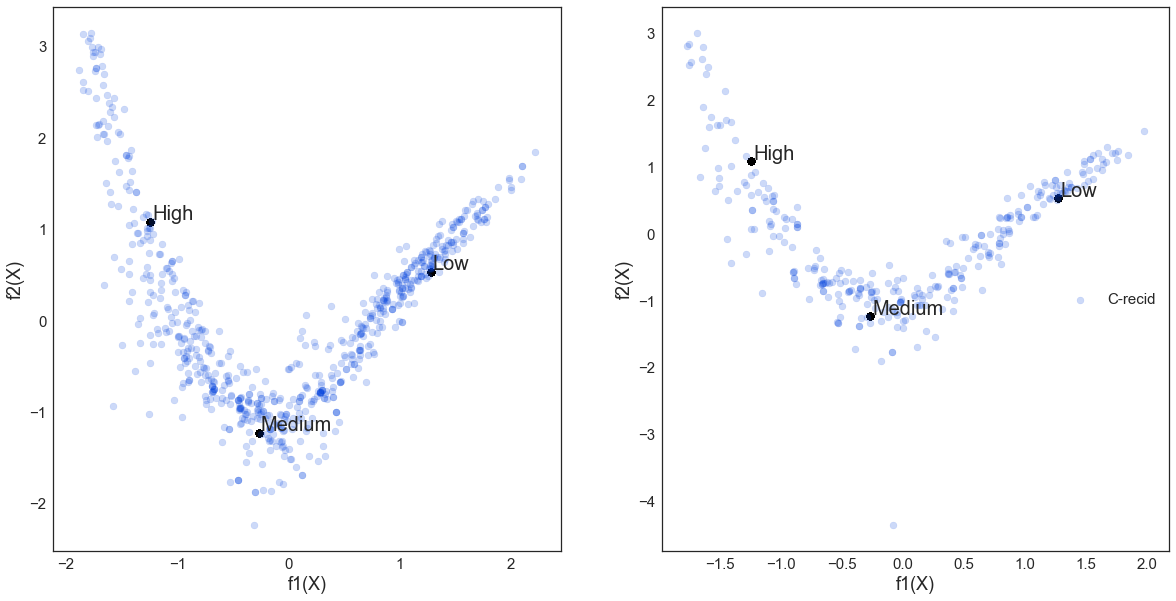

In [487]:
d = 2
palette = [ 'green', 'blue', 'red']
compas_labels = ['Low', 'Medium', 'High']

fig, ax = plt.subplots(1, 2, figsize=(20, 10))


j=0
F_train = wF_train[j]
G_train = wG_train[j]
F_test = wF_test[j]
G_test = wG_test[j]
plot_pics_recid(F_train, G_train, d, palette, train_labels, compas_labels, ax[0], r_train, recide_train.values)
plot_pics_recid(F_test, G_test, d, palette, test_labels, compas_labels, ax[1], r_test, recide_test.values)
plt.legend(bbox_to_anchor=(1, .5))

In [490]:
def plot_pics_n_recid(F, G, d, palette, labels, text_labels, axis, x1, x2):
    F_separate = np.zeros((len(F), d))
    G_separate = np.zeros((len(G), d))
    for i in range(d):
        F_separate[:, i] = F[:, i]
        G_separate[:, i] = G[:, i]
    for i in range(d-1):
        F_output_temp1 = F_separate[:, i].reshape((len(F_separate), 1))
        F_output_temp2 = F_separate[:, i+1].reshape((len(F_separate), 1))
        
        G_output_temp1 = G_separate[:, i].reshape((len(G_separate), 1)) 
        G_output_temp2 = G_separate[:, i+1].reshape((len(G_separate), 1))
                 
        F_output_draw1aa1 = F_output_temp1[(x2==0) & (x1[:, 0]==0)]
        F_output_draw1c1 = F_output_temp1[(x2==0) & (x1[:, 0]==1)]
        F_output_draw2aa1 = F_output_temp2[(x2==0) & (x1[:, 0]==0)]
        F_output_draw2c1 = F_output_temp2[(x2==0) & (x1[:, 0]==1)]

        axis.scatter(F_output_draw1aa1, F_output_draw2aa1, alpha = 0.1, color=sns.xkcd_rgb[palette[2]], label=('AA-recid'), marker='o')
#         axis.scatter(F_output_draw1c1, F_output_draw2c1, alpha = 0.1, color=sns.xkcd_rgb[palette[1]], label=('C-recid'), marker='o')
        for j in range(d+1):         
            G_output_draw1 = G_output_temp1[labels==j]
            G_output_draw2 = G_output_temp2[labels==j]
            
            axis.scatter(G_output_draw1, G_output_draw2, color='black')
            axis.text(G_output_draw1[0]+0.02, G_output_draw2[0]+0.02, text_labels[j], fontsize=20)
        axis.set_xlabel('f'+str(i+1)+'(X)', fontsize=18)
        axis.set_ylabel('f'+str(i+2)+'(X)', fontsize=18)

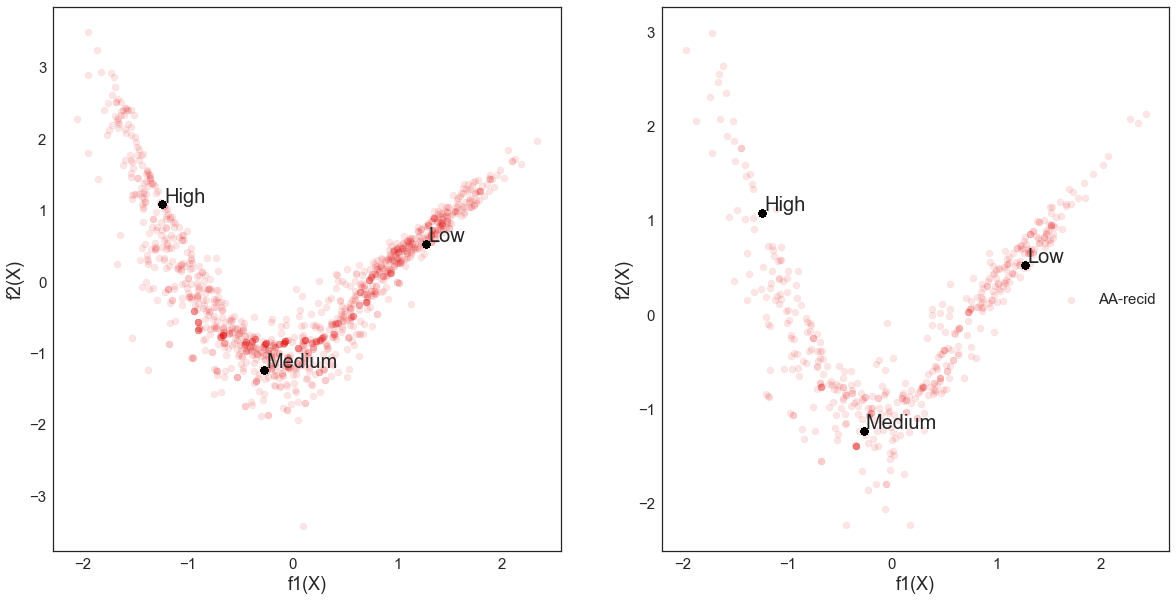

In [491]:
d = 2
palette = [ 'green', 'blue', 'red']
compas_labels = ['Low', 'Medium', 'High']

fig, ax = plt.subplots(1, 2, figsize=(20, 10))


j=0
F_train = wF_train[j]
G_train = wG_train[j]
F_test = wF_test[j]
G_test = wG_test[j]
plot_pics_n_recid(F_train, G_train, d, palette, train_labels, compas_labels, ax[0], r_train, recide_train.values)
plot_pics_n_recid(F_test, G_test, d, palette, test_labels, compas_labels, ax[1], r_test, recide_test.values)
plt.legend(bbox_to_anchor=(1, .5))

## Gender

In [406]:
def plot_pics_gender(F, G, d, palette, labels, text_labels, axis, x):
    F_separate = np.zeros((len(F), d))
    G_separate = np.zeros((len(G), d))
    for i in range(d):
        F_separate[:, i] = F[:, i]
        G_separate[:, i] = G[:, i]
    for i in range(d-1):
        F_output_temp1 = F_separate[:, i].reshape((len(F_separate), 1))
        F_output_temp2 = F_separate[:, i+1].reshape((len(F_separate), 1))
        
        G_output_temp1 = G_separate[:, i].reshape((len(G_separate), 1)) 
        G_output_temp2 = G_separate[:, i+1].reshape((len(G_separate), 1))
        for j in range(d+1):         
            F_output_draw1f = F_output_temp1[(labels==j) & (x.values[:, 0]==0)]
            F_output_draw1m = F_output_temp1[(labels==j) & (x.values[:, 0]==0)]
            F_output_draw2f = F_output_temp2[(labels==j) & (x.values[:, 0]==1)]
            F_output_draw2m = F_output_temp2[(labels==j) & (x.values[:, 0]==0)]
            
            axis.scatter(F_output_draw1f, F_output_draw2f, alpha = 0.1, color=sns.xkcd_rgb[palette[2]], label=(text_labels[j]), marker='x')
            axis.scatter(F_output_draw1m, F_output_draw2m, alpha = 0.1, color=sns.xkcd_rgb[palette[1]], label=(text_labels[j]), marker='o')
        for j in range(d+1):         
            G_output_draw1 = G_output_temp1[labels==j]
            G_output_draw2 = G_output_temp2[labels==j]
            
            axis.scatter(G_output_draw1, G_output_draw2, color='black')
            axis.text(G_output_draw1[0]+0.02, G_output_draw2[0]+0.02, text_labels[j], fontsize=20)
            axis.set_xlabel('f'+str(i+1)+'(X)', fontsize=18)
            axis.set_ylabel('f'+str(i+2)+'(X)', fontsize=18)
#             axis.legend(loc='best', fontsize=12)

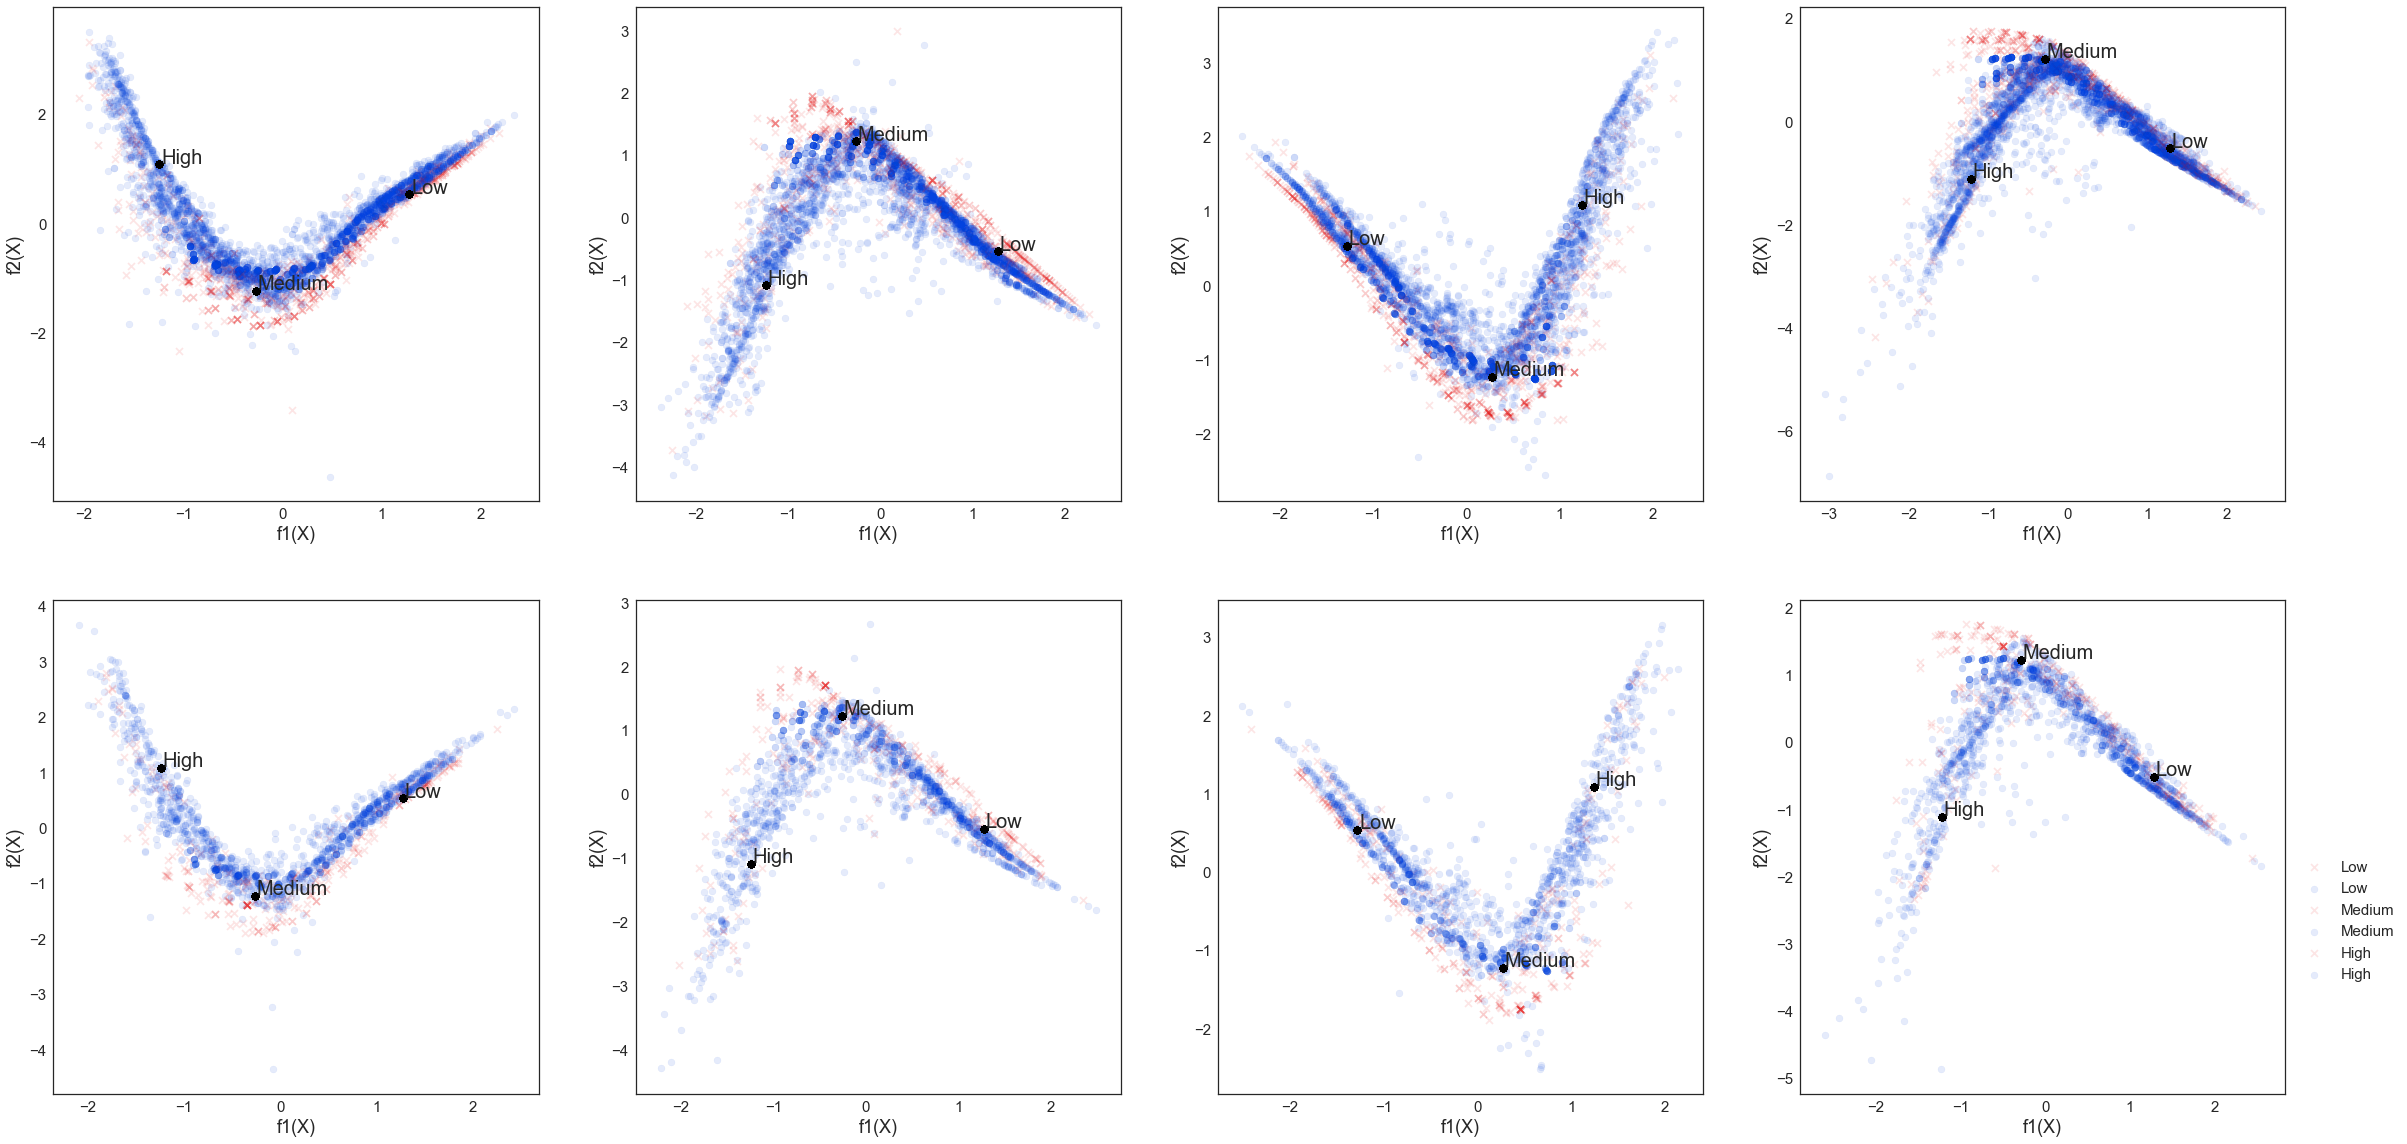

In [407]:
d = 2
palette = [ 'green', 'blue', 'red']
compas_labels = ['Low', 'Medium', 'High']

fig, ax = plt.subplots(2, 4, figsize=(40, 20))


for j in range(4):
    F_train = wF_train[j]
    G_train = wG_train[j]
    F_test = wF_test[j]
    G_test = wG_test[j]
    plot_pics_gender(F_train, G_train, d, palette, train_labels, compas_labels, ax[0, j], train_x)
    plot_pics_gender(F_test, G_test, d, palette, test_labels, compas_labels, ax[1, j], test_x)
plt.legend(bbox_to_anchor=(1, .5))

## Race

In [376]:
r_train = np.zeros((len(race_train), 1))
r_test = np.zeros((len(race_test), 1))
for i in range(len(r_train)):
    if race_train.values[i] == 'African-American':
        r_train[i] = 0
    elif race_train.values[i] == 'Caucasian':
        r_train[i] = 1
    else:
        r_train[i] = 2
for i in range(len(r_test)):
    if race_test.values[i] == 'African-American':
        r_test[i] = 0
    elif race_test.values[i] == 'Caucasian':
        r_test[i] = 1
    else:
        r_test[i] = 2

In [412]:
def plot_pics_race(F, G, d, palette, labels, text_labels, text_labels_2, axis, x, a):
    F_separate = np.zeros((len(F), d))
    G_separate = np.zeros((len(G), d))
    for i in range(d):
        F_separate[:, i] = F[:, i]
        G_separate[:, i] = G[:, i]
    for i in range(d-1):
        F_output_temp1 = F_separate[:, i].reshape((len(F_separate), 1))
        F_output_temp2 = F_separate[:, i+1].reshape((len(F_separate), 1))
        
        G_output_temp1 = G_separate[:, i].reshape((len(G_separate), 1)) 
        G_output_temp2 = G_separate[:, i+1].reshape((len(G_separate), 1))
        for j in range(d+1):         
            F_output_draw1aa = F_output_temp1[(labels==j) & (x[:, 0]==0)]
            F_output_draw1c = F_output_temp1[(labels==j) & (x[:, 0]==1)]
            F_output_draw1o = F_output_temp1[(labels==j) & (x[:, 0]==2)]
            F_output_draw2aa = F_output_temp2[(labels==j) & (x[:, 0]==0)]
            F_output_draw2c = F_output_temp2[(labels==j) & (x[:, 0]==1)]
            F_output_draw2o = F_output_temp2[(labels==j) & (x[:, 0]==2)]
            
            axis.scatter(F_output_draw1aa, F_output_draw2aa, alpha = a, color=sns.xkcd_rgb[palette[j][2]], label=(text_labels[j][2]), marker='o')
            axis.scatter(F_output_draw1c, F_output_draw2c, alpha = a, color=sns.xkcd_rgb[palette[j][1]], label=(text_labels[j][1]), marker='o')
            axis.scatter(F_output_draw1o, F_output_draw2o, alpha = a, color=sns.xkcd_rgb[palette[j][0]], label=(text_labels[j][2]), marker='o')
        for j in range(d+1):         
            G_output_draw1 = G_output_temp1[labels==j]
            G_output_draw2 = G_output_temp2[labels==j]
            
            axis.scatter(G_output_draw1, G_output_draw2, color='black')
            axis.text(G_output_draw1[0]+0.02, G_output_draw2[0]+0.02, text_labels_2[j], fontsize=20)
            axis.set_xlabel('f'+str(i+1)+'(X)', fontsize=18)
            axis.set_ylabel('f'+str(i+2)+'(X)', fontsize=18)

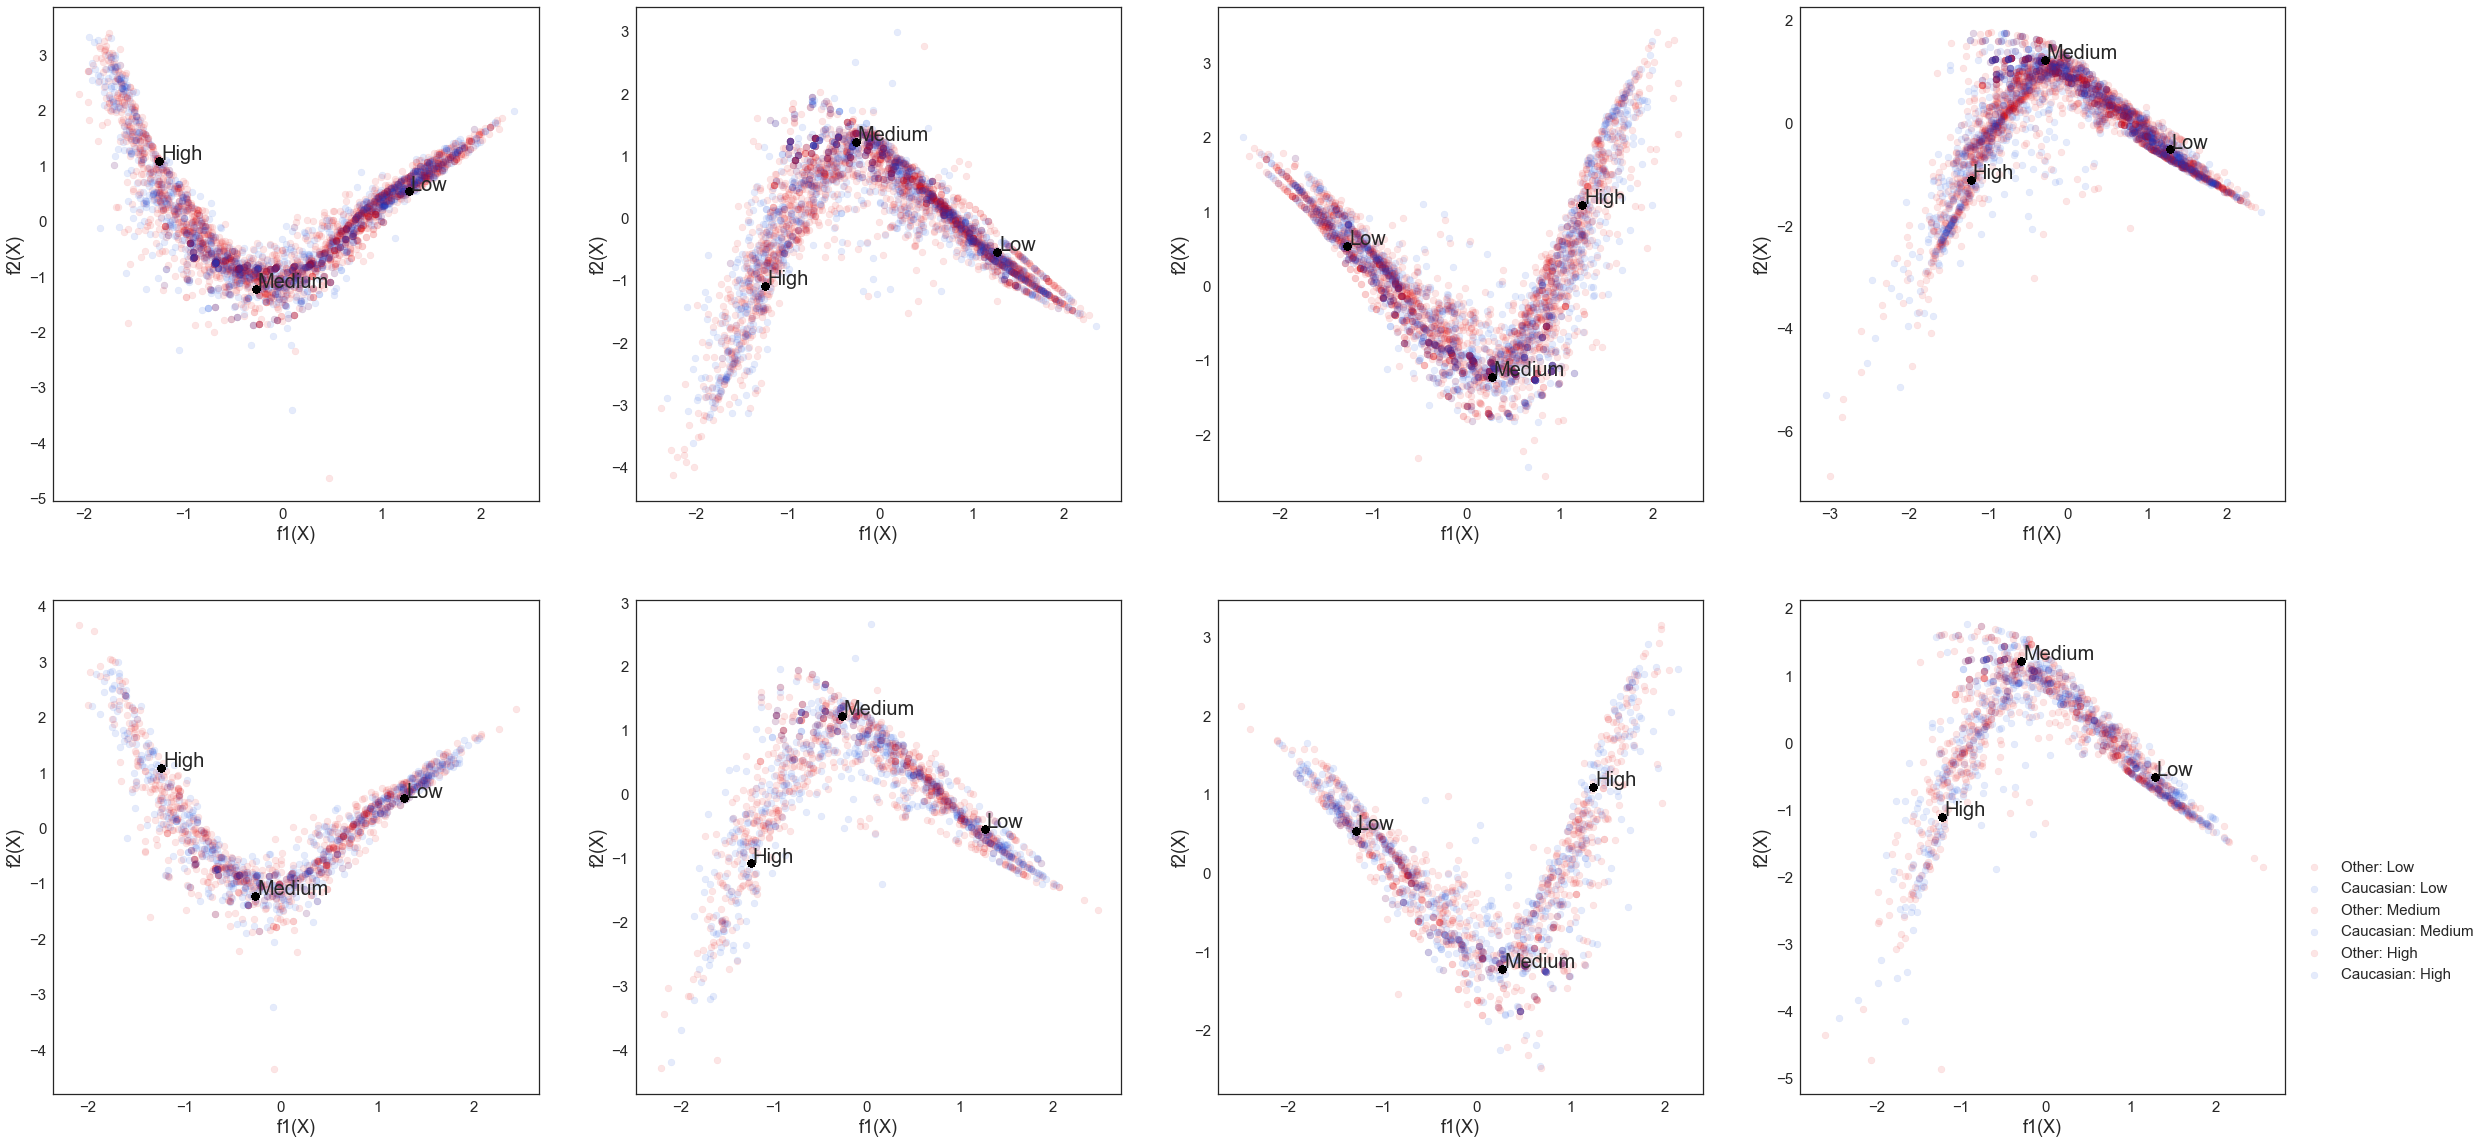

In [413]:
d = 2
# palette = [ ['bright green', 'green', 'dark green'], ['light blue', 'blue', 'dark blue'], ['salmon', 'red', 'scarlet']]
palette = [['green', 'blue', 'red'], ['green', 'blue', 'red'], ['green', 'blue', 'red']]
race_labels = [['African-American: Low', 'Caucasian: Low', 'Other: Low'], 
                 ['African-American: Medium', 'Caucasian: Medium', 'Other: Medium'], 
                 ['African-American: High', 'Caucasian: High', 'Other: High']]
compas_labels = ['Low', 'Medium', 'High']
fig, ax = plt.subplots(2, 4, figsize=(40, 20))

a = 0.1

for j in range(4):
    F_train = wF_train[j]
    G_train = wG_train[j]
    F_test = wF_test[j]
    G_test = wG_test[j]
    plot_pics_race(F_train, G_train, d, palette, train_labels, race_labels, compas_labels, ax[0, j], r_train, a)
    plot_pics_race(F_test, G_test, d, palette, test_labels, race_labels, compas_labels, ax[1, j], r_test, a)
plt.legend(bbox_to_anchor=(1, .5))

## Compare Models in G

In [16]:
def calculate_D_Y(labels, d):
    n_samples = len(labels)
    P_Y = np.zeros((d+1, 1))
    for i in range(d+1):
        P_Y[i] = np.sum(labels==i)/n_samples
    return np.diag(np.ravel(P_Y))

def calculate_G_table(G, labels, d):
    G_table = np.zeros((d+1, d))
    labels = list(labels)
    for i in range(d+1):
        idx = labels.index(i)
        G_table[i, :] = G[idx, :]
    return np.hstack((np.ones((G_table.shape[0], 1)), G_table))

def Lambda_pic(F, G):
    F = np.hstack((np.ones((F.shape[0], 1)), F))
    G = np.hstack((np.ones((G.shape[0], 1)), G))
    pics = np.diagonal(F.transpose().dot(G)/G.shape[0])
    return np.diag(pics)**.5
def Lambda_pic_inv(F, G):
    F = np.hstack((np.ones((F.shape[0], 1)), F))
    G = np.hstack((np.ones((G.shape[0], 1)), G))
    pics = np.diagonal(F.transpose().dot(G)/G.shape[0])**-.5
    return np.diag(pics)

def compare_model(F1, G1, F2, G2, d, labels):
    Lambda1 = Lambda_pic(F1, G1)
    Lambda2 = Lambda_pic_inv(F2, G2)
    DY = calculate_D_Y(labels, d)
    G_1 = calculate_G_table(G1, labels, d)
    G_2 = calculate_G_table(G2, labels, d)
    _, s, _ = sp.linalg.svd( Lambda1.dot(G_1.transpose()).dot(DY).dot(G_2).dot(Lambda2) )
    return s

(array([ 0.5,  1.5,  2.5,  3.5]), <a list of 4 Text xticklabel objects>)

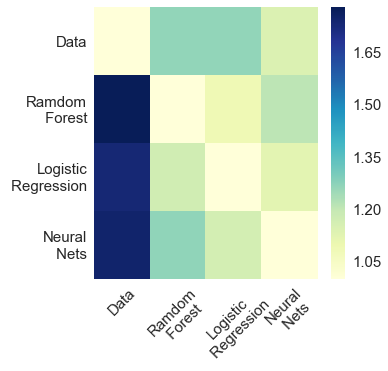

In [132]:
d = 2
subtitles = ['Data', 'Ramdom\n Forest', 'Logistic\n Regression', 'Neural\n Nets']
max_svd = np.zeros((4, 4))
for i in range(4):
    for j in range(4):
        s = compare_model(wF_train[i], wG_train[i], wF_train[j], wG_train[j], d, train_labels[j])
#         print(s)
        max_svd[i][j] = np.max(s)
#         print(subtitles[i] + ' vs ' + subtitles[j] + ', svd: {}'.format(s))
fig = plt.figure(figsize=(5, 5))
sns.heatmap(max_svd, xticklabels=subtitles, yticklabels=subtitles, cmap="YlGnBu")
plt.xticks(rotation=45) 

(array([ 0.5,  1.5,  2.5,  3.5]), <a list of 4 Text xticklabel objects>)

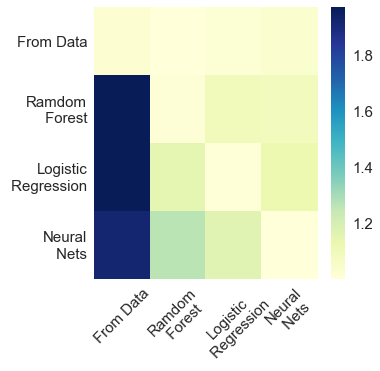

In [91]:
max_svd = np.zeros((4, 4))
for i in range(4):
    for j in range(4):
        s = compare_model(wF_test[i], wG_test[i], wF_test[j], wG_test[j], d, test_labels[j])
        max_svd[i][j] = np.max(s)
#         print(s)
#         print(subtitles[i] + ' vs ' + subtitles[j] + ', svd: {}'.format(s))
fig = plt.figure(figsize=(5, 5))
sns.heatmap(max_svd, xticklabels=subtitles, yticklabels=subtitles, cmap="YlGnBu")
plt.xticks(rotation=45) 

## comparing model F

In [128]:
def compare_model_2(F1, G1, F2, G2, d, labels):
    Lambda1 = Lambda_pic(F1, G1)
    Lambda2 = Lambda_pic_inv(F2, G2)
    F_1 = np.hstack((np.ones((F1.shape[0], 1)), F1))
    F_2 = np.hstack((np.ones((F1.shape[0], 1)), F2))
    _, s, _ = sp.linalg.svd( Lambda1.dot(F_1.transpose()).dot(F_2).dot(Lambda2)/F1.shape[0] )
    return s

(array([ 0.5,  1.5,  2.5,  3.5]), <a list of 4 Text xticklabel objects>)

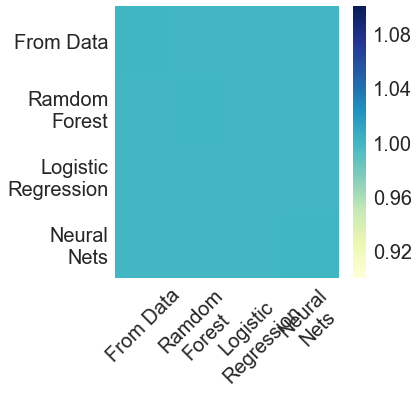

In [129]:
d = 2
subtitles = ['From Data', 'Ramdom\nForest', 'Logistic\nRegression', 'Neural\nNets']
sum_svd = np.zeros((4, 4))
for i in range(4):
    for j in range(4):
        s = compare_model_2(wF_train[i], wG_train[i], wF_train[j], wG_train[j], d, train_labels[j])
        sum_svd[i][j] = np.max(s)
fig = plt.figure(figsize=(5, 5))
sns.heatmap(sum_svd, xticklabels=subtitles, yticklabels=subtitles, cmap="YlGnBu")
plt.xticks(rotation=45) 

(array([ 0.5,  1.5,  2.5,  3.5]), <a list of 4 Text xticklabel objects>)

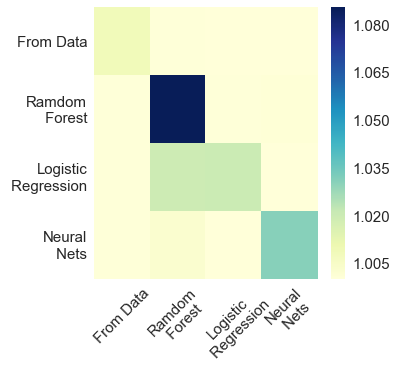

In [72]:
d = 2
subtitles = ['From Data', 'Ramdom\n Forest', 'Logistic\n Regression', 'Neural\n Nets']
sum_svd = np.zeros((4, 4))
for i in range(4):
    for j in range(4):
        s = compare_model_2(wF_test[i], wG_test[i], wF_test[j], wG_test[j], d, test_labels[j])
        sum_svd[i][j] = np.max(s)
fig = plt.figure(figsize=(5, 5))
sns.heatmap(sum_svd, xticklabels=subtitles, yticklabels=subtitles, cmap="YlGnBu")
plt.xticks(rotation=45) 

## Accuracies

In [30]:
def calculate_P_Y(labels, d):
    n_samples = len(labels)
    P_Y = np.zeros((d+1, 1))
    for i in range(d+1):
        P_Y[i] = np.sum(labels==i)/n_samples
    return P_Y

def calculate_G_table(G, labels, d):
    G_table = np.zeros((d+1, d))
    labels = list(labels)
    for i in range(d+1):
        idx = labels.index(i)
        G_table[i, :] = G[idx, :]
    return G_table

def calculate_P_YgX(n_samples, d, F, G_table, PICs, P_Y):
    P_YgX = np.zeros((d+1, n_samples))
    for i in range(n_samples):
        for j in range(d+1):
            P_YgX[j, i] = P_Y[j]*(1+np.sum(PICs*F[i, :]*G_table[j, :]))
    return P_YgX

def calculate_accuracy(n_samples, P_YgX, true_labels):
    cnt = 0
    for i in range(n_samples):
        likelihood = list(P_YgX[:, i])
        max_ = P_YgX[:, i].max()
        if likelihood.index(max_) == true_labels[i]:
            cnt += 1
    return cnt/n_samples

In [43]:
idx = 0
PICs_train = np.diagonal(wF_train[idx].transpose().dot(wG_train[idx])/wG_train[idx].shape[0])
PICs_test = np.diagonal(wF_test[idx].transpose().dot(wG_test[idx])/wG_test[idx].shape[0])
print('Train PICs: {}'.format(PICs_train))
print('Test PICs: {}'.format(PICs_test))

Train PICs: [ 0.68871583  0.37405861]
Test PICs: [ 0.69158969  0.34167006]


In [44]:
d = 2
n_train_samples = len(F_output_train)
n_test_samples = len(F_output_test)
P_Y_train = calculate_P_Y(train_labels[idx], d)

G_table_train = calculate_G_table(wG_train[idx], train_labels[idx], d)
P_YgX_train = calculate_P_YgX(n_train_samples, d, wF_train[idx], G_table_train, PICs_train, P_Y_train)
acc_train = calculate_accuracy(n_train_samples, P_YgX_train, train_labels[idx])

P_YgX_test = calculate_P_YgX(n_test_samples, d, wF_test[idx], G_table_train, PICs_train, P_Y_train)
acc_test = calculate_accuracy(n_test_samples, P_YgX_test, test_labels[idx])

print('Training Accuracy: {0:4f}%'.format(acc_train*100))
print('Test Accuracy: {0:4f}%'.format(acc_test*100))

Training Accuracy: 65.324074%
Test Accuracy: 63.228942%


## Calculate Variance

In [181]:
f1_train = {}
f2_train = {}
f1_test = {}
f2_test = {}

for i in range(3):
    f1_train[i] = wF_train[train_labels==i, 0]
    f2_train[i] = wF_train[train_labels==i, 1]
    f1_test[i] = wF_test[test_labels==i, 0]
    f2_test[i] = wF_test[test_labels==i, 1]

In [184]:
print('var(f1|L=0) = {}'.format(np.var(f1_train[0])))
print('var(f1|L=1) = {}'.format(np.var(f1_train[1])))
print('var(f1|L=2) = {}'.format(np.var(f1_train[2])))
print('var(f2|L=0) = {}'.format(np.var(f2_train[0])))
print('var(f2|L=1) = {}'.format(np.var(f2_train[1])))
print('var(f2|L=2) = {}'.format(np.var(f2_train[2])))

var(f1|L=0) = 0.45519289314728384
var(f1|L=1) = 0.5597182676736412
var(f1|L=2) = 0.5529125425456068
var(f2|L=0) = 0.6644142444517773
var(f2|L=1) = 0.6337152455971123
var(f2|L=2) = 1.4904946036157456


## PCA

In [188]:
from sklearn.decomposition import PCA

In [189]:
pca = PCA(n_components=2)
train_x_pca = pca.fit_transform(train_x)
test_x_pca = pca.fit_transform(test_x)

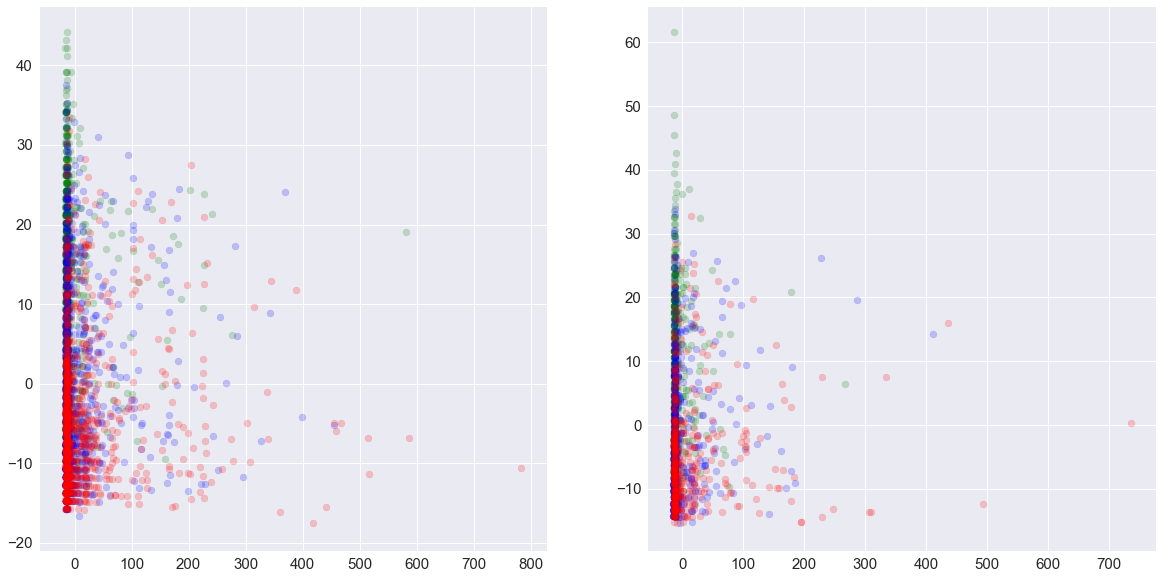

In [196]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
c = ['g', 'b', 'r']
for i in range(3):
    ax[0].scatter(train_x_pca[:, 0][train_labels==i], train_x_pca[:, 1][train_labels==i], color=c[i], alpha=0.2)
    ax[1].scatter(test_x_pca[:, 0][test_labels==i], test_x_pca[:, 1][test_labels==i], color=c[i], alpha=0.2)

Notice that there are some negative entries. Below is the description of the cleanup of this dataset done in the ProPublica analysis. In the original notebook the authors state:

> There are a number of reasons remove rows because of missing data:
> * If the charge date of a defendants Compas scored crime was not within 30 days from when the person was arrested, we assume that because of data quality reasons, that we do not have the right offense.
> * We coded the recidivist flag -- `is_recid` -- to be -1 if we could not find a compas case at all.
> * In a similar vein, ordinary traffic offenses -- those with a `c_charge_degree` of 'O' -- will not result in Jail time are removed (only two of them).
> * We filtered the underlying data from Broward county to include only those rows representing people who had either recidivated in two years, or had at least two years outside of a correctional facility.

We repeat this filtering below.

In [ ]:
# ix is the index of variables we want to keep.

# Remove entries with inconsistent arrest information.
ix = df['days_b_screening_arrest'] <= 30
ix = (df['days_b_screening_arrest'] >= -30) & ix

# remove entries entries where compas case could not be found.
ix = (df['is_recid'] != -1) & ix

# remove traffic offenses.
ix = (df['c_charge_degree'] != "O") & ix

# remove entries without available text scores.
ix = (df['score_text'] != 'N/A') & ix

# trim dataset
df = df.loc[ix,:]

# create new attribute "length of stay" with total jail time.
df['length_of_stay'] = (pd.to_datetime(df['c_jail_out'])-pd.to_datetime(df['c_jail_in'])).apply(lambda x: x.days)

# print number of rows
print('Number of rows : '+str(len(df)))
# print list of features again
print('Features: '+str(list(df)))

In [ ]:
import gzip
# import shutil
# with data1 as f_in:
with gzip.open('noisy_mnist.gz', 'wt') as f:
    f.write(data1)

In [ ]:
XXX = itemlist[0][0]

In [ ]:
y_train = pd.get_dummies(itemlist[0][1])

In [ ]:
itemlist[0][1]

We restrict our analysis to African-American and Caucasian, since we have significantly more samples for these two groups. We remove entries not marked as African-American or Caucasian, and look at the distribution of COMPAS scores.

In [ ]:
df = df.loc[df['race'].isin(['African-American','Caucasian'])]

## COMPAS score distribution

Let's look at the COMPAS score distribution between African-Americans and Caucasians (matches the one in the ProPublica article).

In [ ]:
table = df.groupby(['race','decile_score']).size().reset_index().pivot(index='decile_score',columns='race',values=0)

# percentage of defendants in each score category
100*table/table.sum()

In [ ]:
# now in visual form
x = df.loc[df['race']=='African-American','decile_score'].values
y = df.loc[df['race']=='Caucasian','decile_score'].values
plt.figure(figsize=[10,8])
plt.hist([x,y],normed=True)
plt.legend(['African-American','Caucasian'])
plt.title('COMPAS score distribution')
plt.xlabel('Score')
plt.ylabel('Fraction of population')

In [ ]:
# now in visual form
x = df.loc[(df['race']=='African-American')&(df['two_year_recid']==1),'decile_score'].values
y = df.loc[(df['race']=='Caucasian')&(df['two_year_recid']==1),'decile_score'].values
plt.figure(figsize=[10,8])
plt.hist([x,y],normed=True)
plt.legend(['African-American','Caucasian'])
plt.title('COMPAS score distribution')
plt.xlabel('Score')
plt.ylabel('Fraction of population')

As you can observe, there is a large discrepancy. Does this change when we condition on other random variables? Let's look at the distribution of scores for individuals with more than 2 priors.

In [ ]:
df_2priors = df.loc[df['priors_count']>=2]
x = df_2priors.loc[df_2priors['race']=='African-American','decile_score'].values
y = df_2priors.loc[df_2priors['race']=='Caucasian','decile_score'].values
plt.figure(figsize=[12,7])
plt.hist([x,y],normed=True)
plt.legend(['African-American','Caucasian'])
plt.title('COMPAS score distribution for defendants with more than 2 priors')
plt.xlabel('Score')
plt.ylabel('Fraction of population')

Still a big difference.

### Question: How does the COMPAS score distribution change under different conditionings (e.g. degree charged, length of prison stay, etc.)? Does a Simpson's Paradox-like phenomenom happen?

In [ ]:
# hard to find... For example at young felons with no priors
df_ans = df.loc[(df['priors_count']==0)&(df['c_charge_degree']=='F')&df['age']<=25]
x = df_ans.loc[df_ans['race']=='African-American','decile_score'].values
y = df_ans.loc[df_ans['race']=='Caucasian','decile_score'].values
plt.figure(figsize=[12,7])
plt.hist([x,y],normed=True)
plt.legend(['African-American','Caucasian'])
plt.title('COMPAS score distribution - Less than 25, charged with felony and no priors')
plt.xlabel('Score')
plt.ylabel('Fraction of population')

We quantize our dataset next to make the analysis a little bit easier.

In [ ]:
dfQ = df.copy()

# Quantize priors count between 0, 1-3, and >3
def quantizePrior(x):
    if x <=0:
        return '0'
    elif 1<=x<=3:
        return '1 to 3'
    else:
        return 'More than 3'

    
# Quantize length of stay
def quantizeLOS(x):
    if x<= 7:
        return '<week'
    if 8<x<=93:
        return '<3months'
    else:
        return '>3 months'
    
# Quantize length of stay
def adjustAge(x):
    if x == '25 - 45':
        return '25 to 45'
    else:
        return x

# Quantize score_text to MediumHigh
def quantizeScore(x):
    if (x == 'High')| (x == 'Medium'):
        return 1
    else:
        return 0

    
dfQ['priors_count'] = dfQ['priors_count'].apply(quantizePrior)
dfQ['length_of_stay'] = dfQ['length_of_stay'].apply(quantizeLOS)
dfQ['score_text'] = dfQ['score_text'].apply(quantizeScore)
dfQ['age_cat'] = dfQ['age_cat'].apply(adjustAge)

Now we can look at the percentage difference of the average COMPAS scores between Caucasians and African-Americans for different groups. (**Important**: error bars omitted, so large differences may be due to limited samples)

**ISIT Fairness**

$$X=(X_1,X_2,X_3,X_4,X_5)=(\text{age},\text{charge degree}, \text{sex}, \text{priors}, \text{length of stay})$$

In [ ]:
#alphabets of all features
list_age =['Less than 25', '25 to 45', 'Greater than 45']
list_cdegree = ['F', 'M']
list_sex=['Male','Female']
list_priors=['0','1 to 3','More than 3']
list_stay=['<week','<3months','>3 months']

#alphabet of output
list_output=[0,1]

#length of alphabets
len_age = len(list_age)
len_cdegree = len(list_cdegree)
len_sex = len(list_sex)
len_priors = len(list_priors)
len_stay = len(list_stay)
len_output = len(list_output)

#dataset
dfQs=dfQ[['race','age_cat','c_charge_degree','sex','priors_count','length_of_stay','is_recid']]

#Lagragian parameter
Llambda=1

Compute the distribution $P_X$.

In [ ]:
#input: features(age, charge degree, sex, priors, length of stay)
#output: probability
def Dist_PX(x1,x2,x3,x4,x5):
    is_x1 = dfQs['age_cat'] == x1
    is_x2 = dfQs['c_charge_degree'] == x2
    is_x3 = dfQs['sex'] == x3
    is_x4 = dfQs['priors_count'] == x4
    is_x5 = dfQs['length_of_stay'] == x5
    return float(len(dfQs[is_x1&is_x2&is_x3&is_x4&is_x5]))/len(dfQs)

#Create a matrix to store distribution
PX = np.zeros((len_age,len_cdegree,len_sex,len_priors,len_stay))
for x1 in range(len_age):
    for x2 in range(len_cdegree):
        for x3 in range(len_sex):
            for x4 in range(len_priors):
                for x5 in range(len_stay):
                    PX[x1,x2,x3,x4,x5] = Dist_PX(list_age[x1],list_cdegree[x2],list_sex[x3],list_priors[x4],list_stay[x5])

Compute the channel $W_{Y|X}$

We temporarily use $P_{Y|X}$ as the channel.

In [ ]:
#input: features(age, charge degree, sex, priors, length of stay, output)
#output: conditional probability
def Dist_WYX(x1,x2,x3,x4,x5,y):
    is_x1 = dfQs['age_cat'] == x1
    is_x2 = dfQs['c_charge_degree'] == x2
    is_x3 = dfQs['sex'] == x3
    is_x4 = dfQs['priors_count'] == x4
    is_x5 = dfQs['length_of_stay'] == x5
    is_y = dfQs['is_recid'] == y
    if len(dfQs[is_x1&is_x2&is_x3&is_x4&is_x5])==0:
        return 0
    else:
        return float(len(dfQs[is_x1&is_x2&is_x3&is_x4&is_x5&is_y]))/len(dfQs[is_x1&is_x2&is_x3&is_x4&is_x5])

#Create a matrix to store distribution
WYX = np.zeros((len_age,len_cdegree,len_sex,len_priors,len_stay,len_output))
for x1 in range(len_age):
    for x2 in range(len_cdegree):
        for x3 in range(len_sex):
            for x4 in range(len_priors):
                for x5 in range(len_stay):
                    for y in range(len_output):
                        WYX[x1,x2,x3,x4,x5,y] = Dist_WYX(list_age[x1],list_cdegree[x2],list_sex[x3],list_priors[x4],list_stay[x5],list_output[y])

Compute the distribution $Q_X = P_{X\mid\text{Race}=\text{Caucasian}}$.

In [ ]:
#input: features(age, charge degree, sex, priors, length of stay)
#output: probability given Race=Caucasian
def Dist_QX(x1,x2,x3,x4,x5):
    is_x0 = dfQs['race'] == 'Caucasian'
    is_x1 = dfQs['age_cat'] == x1
    is_x2 = dfQs['c_charge_degree'] == x2
    is_x3 = dfQs['sex'] == x3
    is_x4 = dfQs['priors_count'] == x4
    is_x5 = dfQs['length_of_stay'] == x5
    return float(len(dfQs[is_x0&is_x1&is_x2&is_x3&is_x4&is_x5]))/len(dfQs[is_x0])

#Create a matrix to store distribution
QX = np.zeros((len_age,len_cdegree,len_sex,len_priors,len_stay))
for x1 in range(len_age):
    for x2 in range(len_cdegree):
        for x3 in range(len_sex):
            for x4 in range(len_priors):
                for x5 in range(len_stay):
                    QX[x1,x2,x3,x4,x5] = Dist_PX(list_age[x1],list_cdegree[x2],list_sex[x3],list_priors[x4],list_stay[x5])

Compute the distribution $R_X = P_{X\mid\text{Race}=\text{African-American}}$.

In [ ]:
#input: features(age, charge degree, sex, priors, length of stay)
#output: probability given Race=African-American
def Dist_RX(x1,x2,x3,x4,x5):
    is_x0 = dfQs['race'] == 'African-American'
    is_x1 = dfQs['age_cat'] == x1
    is_x2 = dfQs['c_charge_degree'] == x2
    is_x3 = dfQs['sex'] == x3
    is_x4 = dfQs['priors_count'] == x4
    is_x5 = dfQs['length_of_stay'] == x5
    return float(len(dfQs[is_x0&is_x1&is_x2&is_x3&is_x4&is_x5]))/len(dfQs[is_x0])

#Create a matrix to store distribution
RX = np.zeros((len_age,len_cdegree,len_sex,len_priors,len_stay))
for x1 in range(len_age):
    for x2 in range(len_cdegree):
        for x3 in range(len_sex):
            for x4 in range(len_priors):
                for x5 in range(len_stay):
                    RX[x1,x2,x3,x4,x5] = Dist_RX(list_age[x1],list_cdegree[x2],list_sex[x3],list_priors[x4],list_stay[x5])

Compute the distribution $Q_Y$ by passing $Q_X$ through the given channel $W_{Y|X}$

In [ ]:
def Dist_QY(y):
    sum_prob_QY = 0
    for x1 in list_age:
        for x2 in list_cdegree:
            for x3 in list_sex:
                for x4 in list_priors:
                    for x5 in list_stay:
                        sum_prob_QY = sum_prob_QY + Dist_QX(x1,x2,x3,x4,x5) * Dist_WYX(x1,x2,x3,x4,x5,y)
    return sum_prob_QY

QY = np.zeros(len_output)
for y in range(len_output):
    QY[y] = Dist_QY(list_output[y])
    
#print QY

Compute the distribution $R_Y$ by passing $R_X$ through the given channel $W_{Y|X}$

In [ ]:
def Dist_RY(y):
    sum_prob_RY = 0
    for x1 in list_age:
        for x2 in list_cdegree:
            for x3 in list_sex:
                for x4 in list_priors:
                    for x5 in list_stay:
                        sum_prob_RY = sum_prob_RY + Dist_RX(x1,x2,x3,x4,x5) * Dist_WYX(x1,x2,x3,x4,x5,y)
    return sum_prob_RY

RY = np.zeros(len_output)
for y in range(len_output):
    RY[y] = Dist_RY(list_output[y])
    
print(RY)

Compute the conditional distribution
$$R_{X|Y}(x|y)=\frac{R_{X,Y}(x,y)}{R_Y(y)}=\frac{W_{Y|X}(y,x)R_X(x)}{R_Y(y)}$$

In [ ]:
RXY = np.zeros((len_age,len_cdegree,len_sex,len_priors,len_stay,len_output))
for x1 in range(len_age):
    for x2 in range(len_cdegree):
        for x3 in range(len_sex):
            for x4 in range(len_priors):
                for x5 in range(len_stay):
                    for y in range(len_output):
                        RXY[x1,x2,x3,x4,x5,y] = WYX[x1,x2,x3,x4,x5,y]*RX[x1,x2,x3,x4,x5]/RY[y]

Compute the funciton
\begin{equation}
\log\frac{R_X(x)}{Q_X(x)} - \mathbb{E}\left[\log\frac{R_X(X)}{Q_X(X)}\right]
\end{equation}

In [ ]:
def fhat(x1,x2,x3,x4,x5):
    if QX[x1,x2,x3,x4,x5]==0 or RX[x1,x2,x3,x4,x5]==0:
        return 0
    else:
        exp=0
        for xx1 in range(len_age):
            for xx2 in range(len_cdegree):
                for xx3 in range(len_sex):
                    for xx4 in range(len_priors):
                        for xx5 in range(len_stay):
                            if QX[xx1,xx2,xx3,xx4,xx5]>0 and RX[xx1,xx2,xx3,xx4,xx5]>0:
                                exp = exp + RX[xx1,xx2,xx3,xx4,xx5]*np.log(RX[xx1,xx2,xx3,xx4,xx5]/QX[xx1,xx2,xx3,xx4,xx5])
        return np.log(RX[x1,x2,x3,x4,x5]/QX[x1,x2,x3,x4,x5])-exp

Compute the funciton
\begin{equation}
\log\frac{R_Y(y)}{Q_Y(y)} - \mathbb{E}\left[{\log\frac{R_Y(Y)}{Q_Y(Y)}}\right]
\end{equation}

In [ ]:
def ghat(y):
    exp=0
    for y1 in range(len_output):
        exp = exp + RY[y1]*np.log(RY[y1]/QY[y1])
    return np.log(RY[y]/QY[y])-exp

Compute the function $g_1$. 

$g_1(0)=\sqrt{p/(1-p)}$, $g_1(1)=-\sqrt{(1-p)/p}$ where $p=R_Y(1)$

In [ ]:
def g1(y):
    p = RY[1]
    if y==0:
        return np.sqrt(p/(1-p))
    else:
        return -np.sqrt((1-p)/p)

Compute the conditional expectation $\mathbb{E}\left[g_1(Y)|X=x\right]$

In [ ]:
def cond_exp_g1(x1,x2,x3,x4,x5):
    return g1(0)*WYX[x1,x2,x3,x4,x5,0] + g1(1)*WYX[x1,x2,x3,x4,x5,1]

Compute the maximal correlation $\rho_m$

In [ ]:
rho = 0

for x1 in range(len_age):
    for x2 in range(len_cdegree):
        for x3 in range(len_sex):
            for x4 in range(len_priors):
                for x5 in range(len_stay):
                    rho = rho + RX[x1,x2,x3,x4,x5]*cond_exp_g1(x1,x2,x3,x4,x5)**2
rho=np.sqrt(rho)
print(rho)

Compute the function $f_1$.
\begin{equation}
f_1(x)=\frac{\mathbb{E}\left[g_1(Y)|X=x\right]}{\rho_m(R_X;W_{Y|X})}
\end{equation}

In [ ]:
def f1(x1,x2,x3,x4,x5):
    return cond_exp_g1(x1,x2,x3,x4,x5)/rho

Compute the coefficient $a_1$

In [ ]:
a1 = 0
for x1 in range(len_age):
    for x2 in range(len_cdegree):
        for x3 in range(len_sex):
            for x4 in range(len_priors):
                for x5 in range(len_stay):
                    a1 = a1 + RX[x1,x2,x3,x4,x5]*f1(x1,x2,x3,x4,x5)*fhat(x1,x2,x3,x4,x5)

Compute the function $f_2$
\begin{equation}
f_2(x)=\frac{\tilde{f}(x)-a_1f_1(x)}{\sqrt{\mathbb{E}\left[\left(\tilde{f}(X)-a_1f_1(X)\right)^2\right]}},
\end{equation}

In [ ]:
def f2(x1,x2,x3,x4,x5):
    norm_f2 = 0
    for xx1 in range(len_age):
        for xx2 in range(len_cdegree):
            for xx3 in range(len_sex):
                for xx4 in range(len_priors):
                    for xx5 in range(len_stay):
                        norm_f2 = norm_f2 + RX[xx1,xx2,xx3,xx4,xx5]*(fhat(xx1,xx2,xx3,xx4,xx5)-a1*f1(xx1,xx2,xx3,xx4,xx5))**2
    norm_f2 = np.sqrt(norm_f2)
    if norm_f2==0:
        return 0
    else:
        return (fhat(x1,x2,x3,x4,x5)-a1*f1(x1,x2,x3,x4,x5))/norm_f2

Compute the coefficient $a_2$

In [ ]:
a2 = 0
for x1 in range(len_age):
    for x2 in range(len_cdegree):
        for x3 in range(len_sex):
            for x4 in range(len_priors):
                for x5 in range(len_stay):
                    a2 = a2 + RX[x1,x2,x3,x4,x5]*f2(x1,x2,x3,x4,x5)*fhat(x1,x2,x3,x4,x5)

Compute the coefficient $b_1$

In [ ]:
b1 = 0
for y in range(len_output):
    b1 = b1 + RY[y]*g1(y)*ghat(y)

Compute the coefficient $m_1$ and $m_2$

In [ ]:
m1 = -(a1+Llambda*rho*b1)/np.sqrt((a1+Llambda*rho*b1)**2+a2**2)
m2 = -a2/np.sqrt((a1+Llambda*rho*b1)**2+a2**2)

**Output the function $f$ which can achieve the minimal value of the objective function.**

In [ ]:
def opt_f(x1,x2,x3,x4,x5):
    return m1*f1(x1,x2,x3,x4,x5) + m2*f2(x1,x2,x3,x4,x5)

Output the maximal/minimal values of $f$ and where $f$ can achieve those values.

In [ ]:
f_min = 0
f_max = 0
[x1_min,x2_min,x3_min,x4_min,x5_min]=[0,0,0,0,0]
[x1_max,x2_max,x3_max,x4_max,x5_max]=[0,0,0,0,0]

for x1 in range(len_age):
    for x2 in range(len_cdegree):
        for x3 in range(len_sex):
            for x4 in range(len_priors):
                for x5 in range(len_stay):
                    if opt_f(x1,x2,x3,x4,x5) > f_max:
                        f_max = opt_f(x1,x2,x3,x4,x5)
                        [x1_max,x2_max,x3_max,x4_max,x5_max] = [x1,x2,x3,x4,x5]
                    if opt_f(x1,x2,x3,x4,x5) < f_min:
                        f_min = opt_f(x1,x2,x3,x4,x5)
                        [x1_min,x2_min,x3_min,x4_min,x5_min] = [x1,x2,x3,x4,x5]

In [ ]:
print ("Maximal value of f: %f" % f_max)
print ("Age: %s; charge degree: %s; sex: %s; number of prior charges: %s; length of stay: %s" % (list_age[x1_max],list_cdegree[x2_max],list_sex[x3_max],list_priors[x4_max],list_stay[x5_max]))

print ("Minimal value of f: %f" % f_min)
print ("Age: %s; charge degree: %s; sex: %s; number of prior charges: %s; length of stay: %s" % (list_age[x1_min],list_cdegree[x2_min],list_sex[x3_min],list_priors[x4_min],list_stay[x5_min]))

In [ ]:
# create pandas dataframe index
import pandas as pd
df2 = pd.DataFrame(np.zeros((1,6)),columns=['age','degree','sex','priors','stay','f'])


In [ ]:
i =0
for x1 in range(len_age):
    for x2 in range(len_cdegree):
        for x3 in range(len_sex):
            for x4 in range(len_priors):
                for x5 in range(len_stay):
                    df2.loc[i,:] =  [list_age[x1],list_cdegree[x2],list_sex[x3],list_priors[x4],list_stay[x5],opt_f(x1,x2,x3,x4,x5)]
                    i+=1



In [ ]:
df2.groupby(['degree','priors','sex'])['f'].mean()

In [ ]:
df2.sort_values(['f'])

In [ ]:
dfR = dfQs.groupby(['race','age_cat','c_charge_degree','sex','priors_count'])['is_recid'].mean().reset_index()

In [ ]:
dfR.loc[dfR['race']=='African-American']

In [ ]:
dfR.loc[dfR['race']=='Caucasian']